# Clades A & C Density Plots & Correlation Plot
### Data 642 - Advanced Machine Learning
### Sperow, Cassandra 

## Exploratory Data Analysis of Bacteria Densities in Coral Data used in Data 793 with Added Correlation Plot

### Clades A and C

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read in bacteria count sequencing data for clades A and C
# dataset is centered log ratio of original counts using first abundant 1000 ASVs aka individual strains of bacteria
# ex: one ASV is an individual bacteria strain
# client approved of using only first 1000 ASVs
ac_data = pd.read_csv("../output/AC_clr_df_1000.csv")

In [3]:


# take out ITS2 type because it is a subtype of CLade and is not used in analysis
ac_data = ac_data.drop("ITS2_type", axis = 1)

ac_data.shape

(767, 1007)

In [4]:
ac_data.head()

Clade Majority   sample_id  its2_count species region reef   ASV0001  \
0     A   A1/A1c  PKAU-R3-17       10071       P    KAU   R3  0.865035   
1     A       A1   PWAJ-R3-2         377       P    WAJ   R3  2.334155   
2     A       A1  SFAR-R2-18        6947       S    FAR   R2  1.308135   
3     A       A1   SFAR-R1-2       14487       S    FAR   R1  0.000000   
4     A       A1   PDOG-R1-7       11553       P    DOG   R1  0.000000   

    ASV0002   ASV0003  ...  ASV10768  ASV1077  ASV10777  ASV10779  ASV10780  \
0  2.091208  5.829056  ...       0.0      0.0       0.0       0.0       0.0   
1  5.788585  3.340404  ...       0.0      0.0       0.0       0.0       0.0   
2 -0.122611 -0.785905  ...       0.0      0.0       0.0       0.0       0.0   
3  0.000000  0.000000  ...       0.0      0.0       0.0       0.0       0.0   
4  2.439654  6.513846  ...       0.0      0.0       0.0       0.0       0.0   

   ASV10782  ASV10783  ASV10784  ASV10785  ASV10787  
0       0.0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0       0.0  
3       0.0       0.0       0.0       0.0       0.0  
4       0.0       0.0       0.0       0.0       0.0  

[5 rows x 1007 columns]

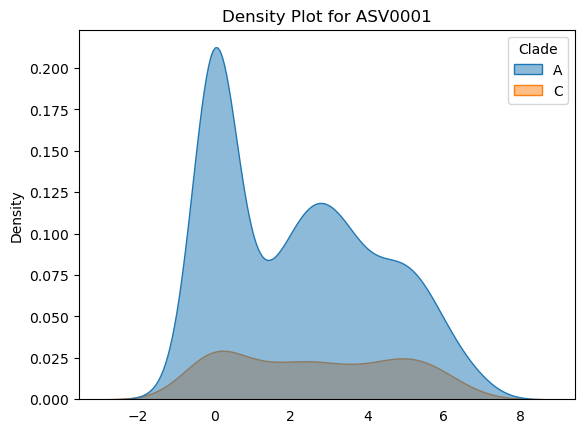

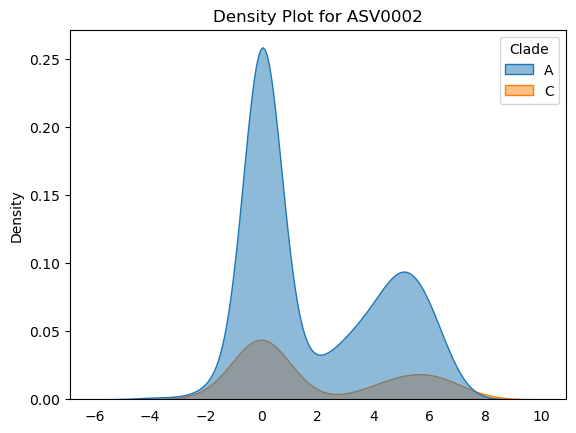

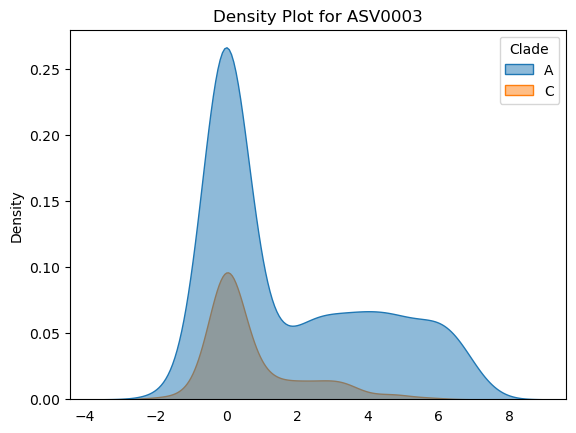

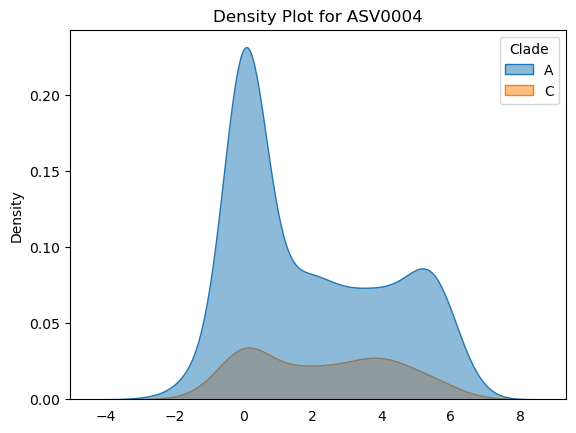

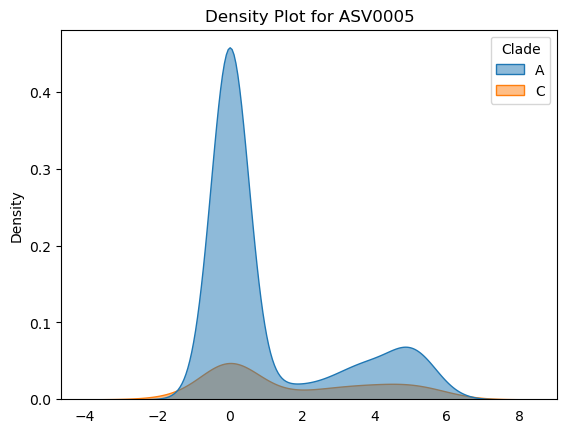

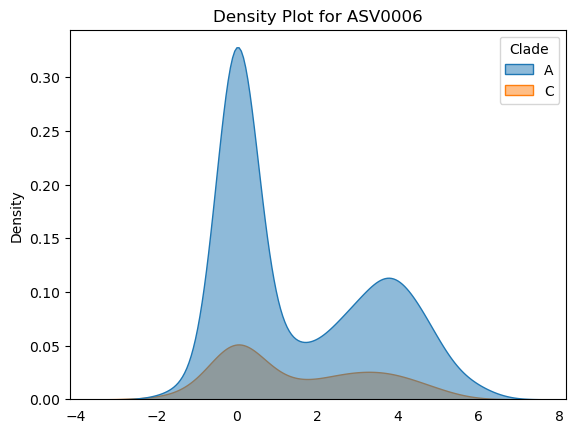

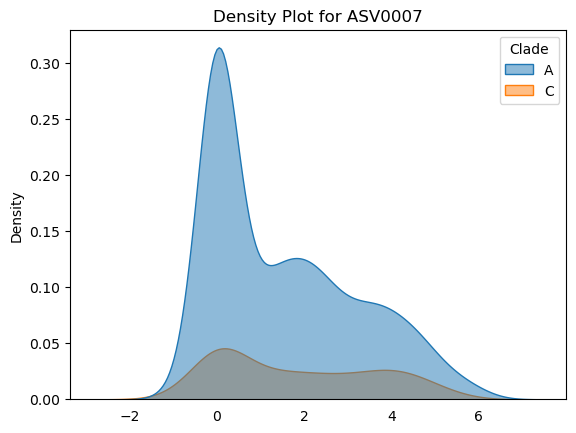

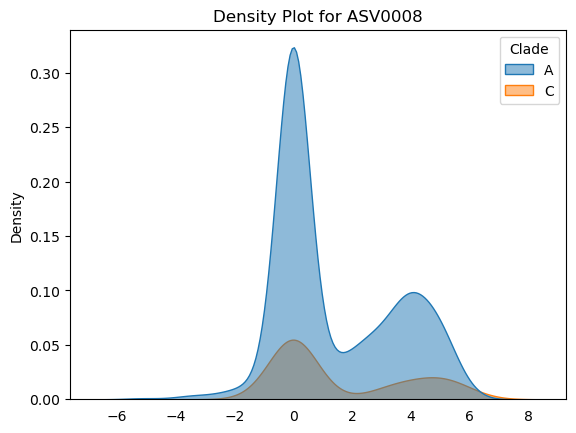

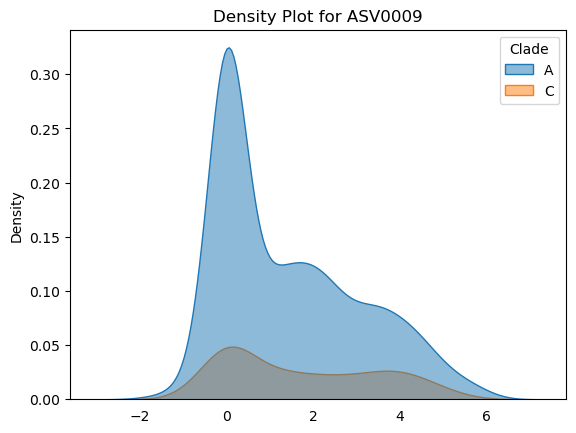

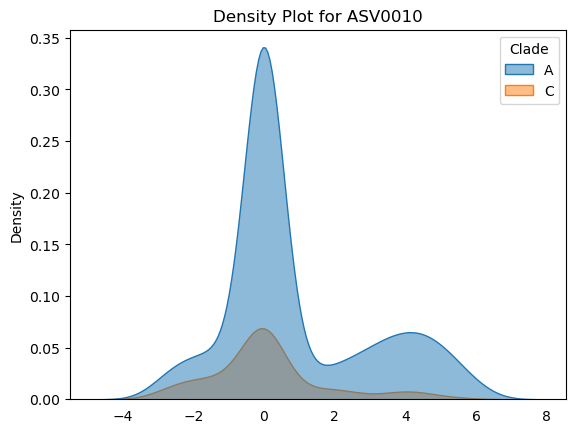

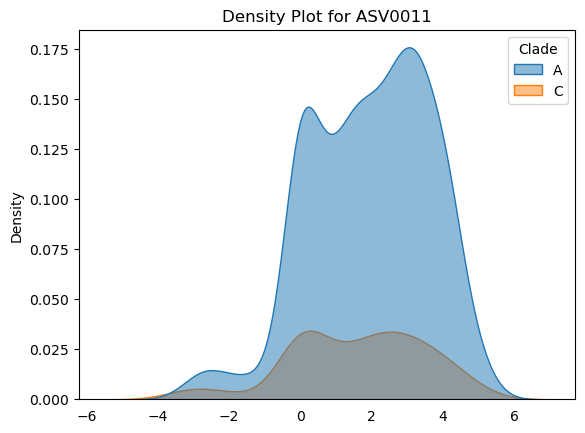

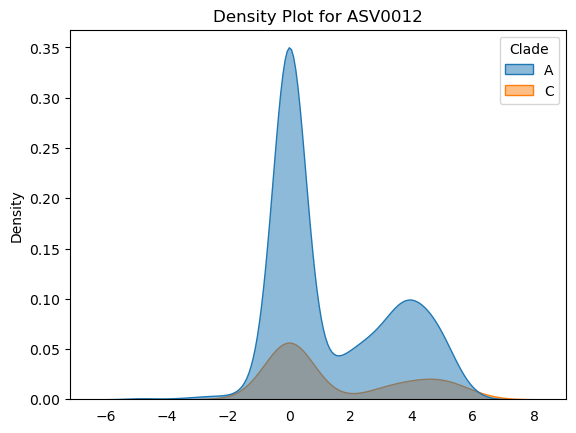

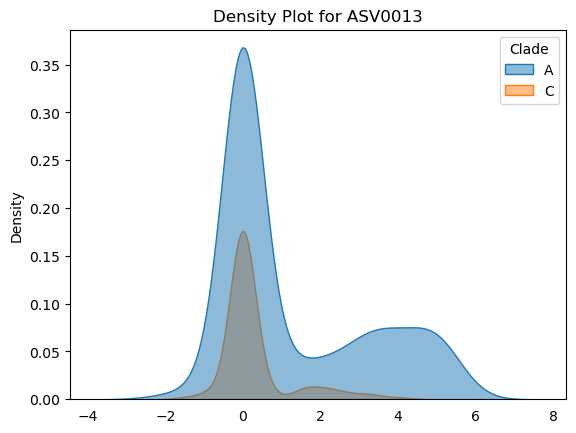

In [5]:
# Create density plots for first 20 ASV numeric columns
for var in ac_data.columns[7:20]:
    plt.figure()
    sns.kdeplot(data=ac_data, x=var, hue='Clade', fill=True, alpha=0.5)
    plt.title(f'Density Plot for {var}')
    plt.xlabel('')
    plt.tick_params(axis='x', which='both', bottom=False, top=False)  # Remove x-axis ticks
    plt.show()

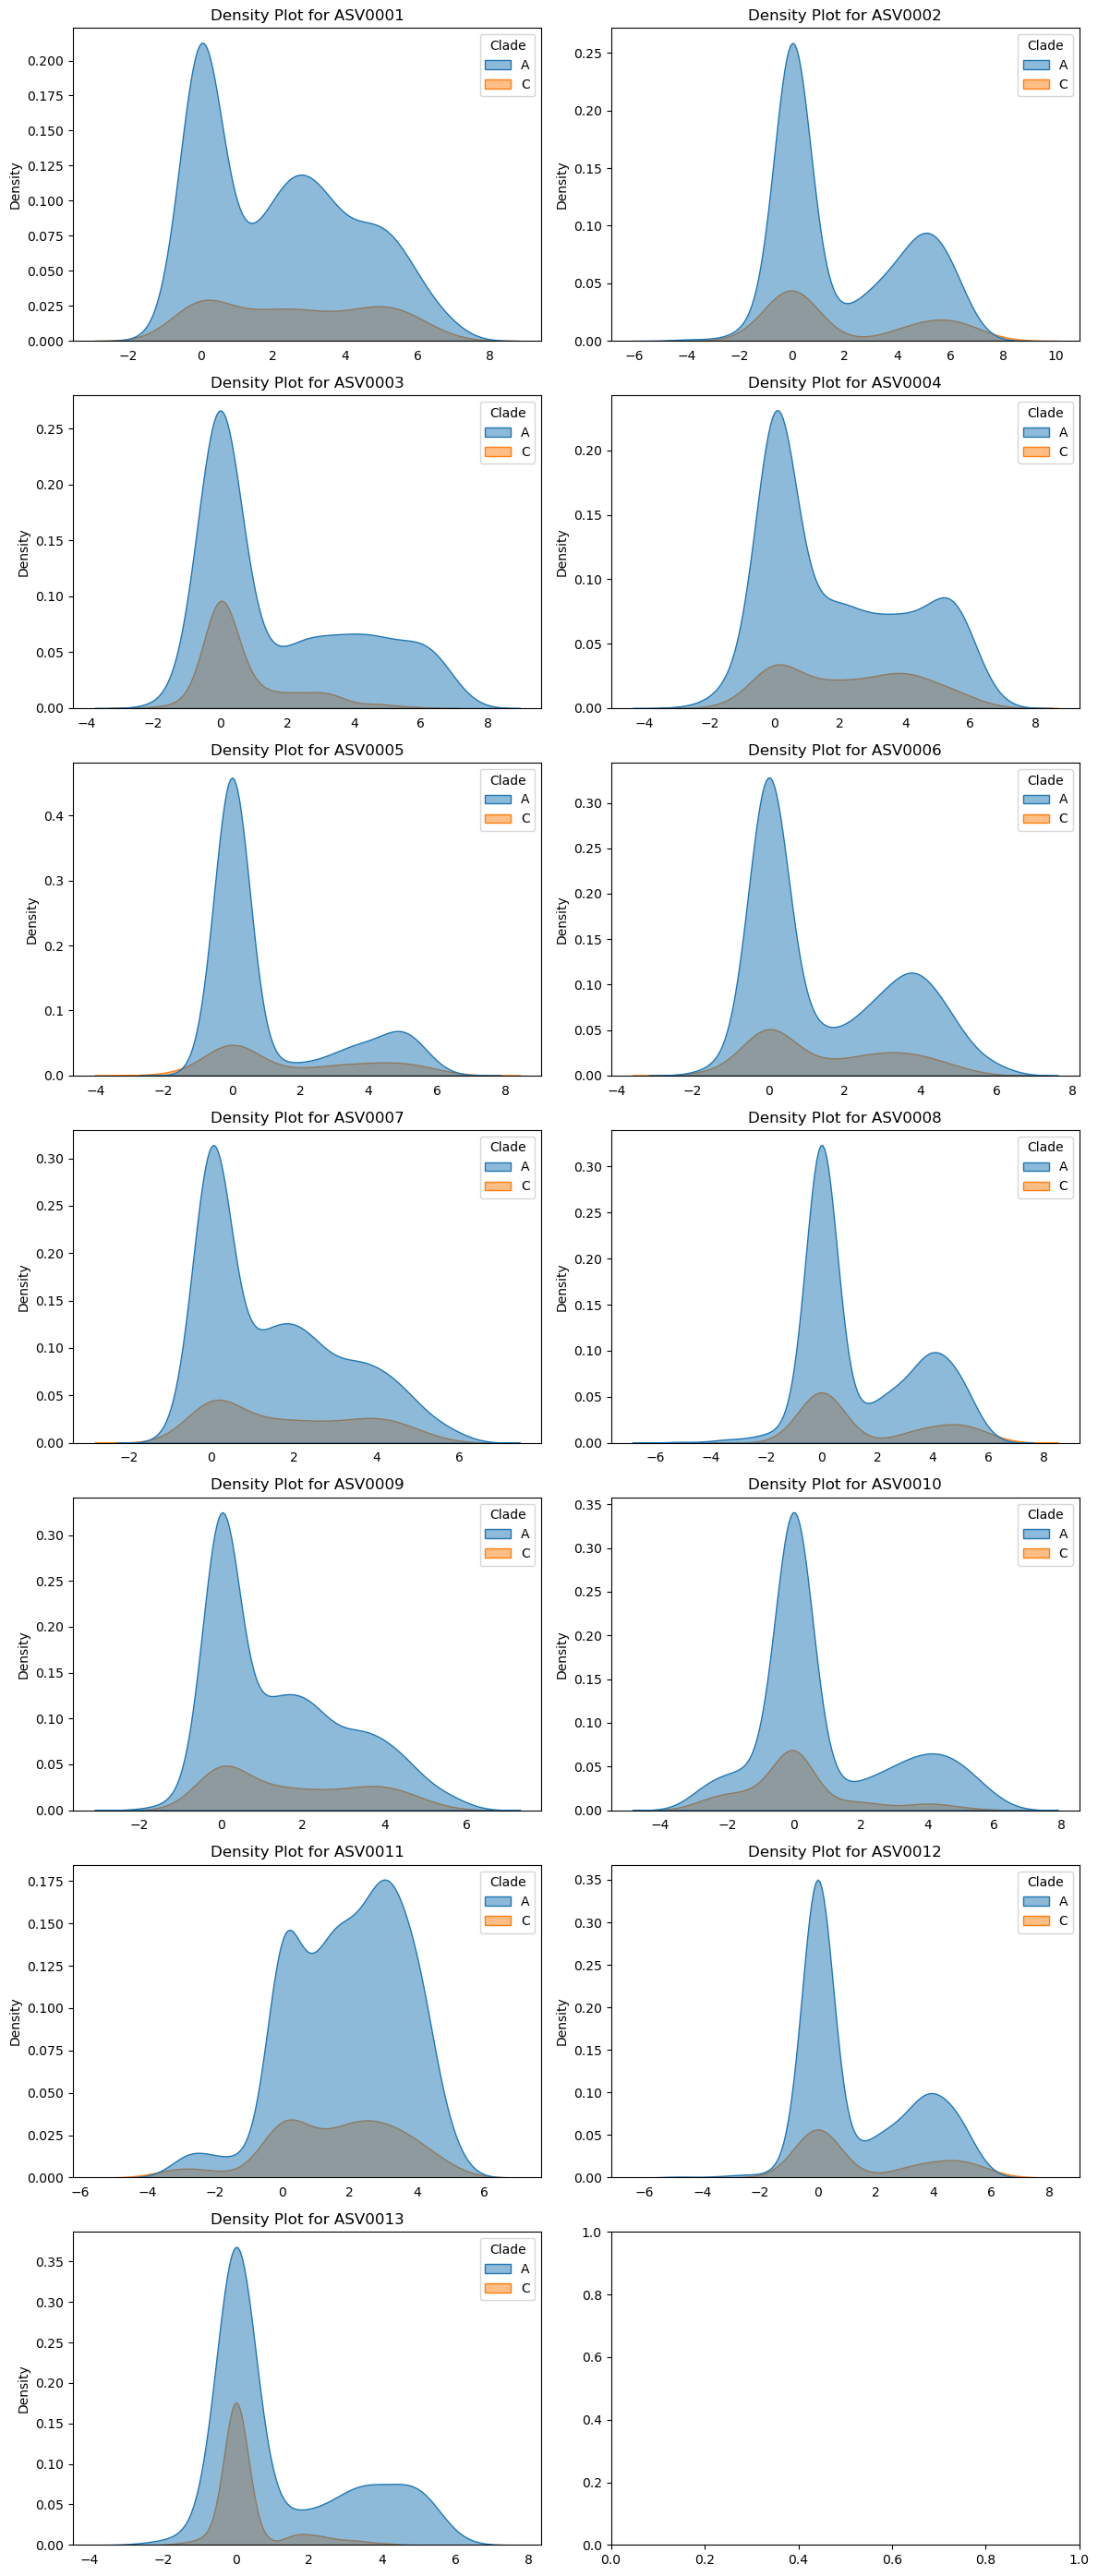

In [6]:
# Create density plots for each numeric column
numeric_columns = ac_data.columns[7:20]
num_plots = len(numeric_columns)
num_rows = (num_plots // 2) + (num_plots % 2)  # Calculate the number of rows needed

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 4*num_rows))

# Flatten the 2D array of axes for easier iteration
axes = axes.flatten()

# Create density plots and arrange them in the grid
for i, var in enumerate(numeric_columns):
    sns.kdeplot(data=ac_data, x=var, hue='Clade', fill=True, alpha=0.5, ax=axes[i])
    axes[i].set_title(f'Density Plot for {var}')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', which='both', bottom=False, top=False)  # Remove x-axis ticks

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('../plots/AC_1-12_grid_plots.png')  # Replace 'grid_plots.png' with your desired file name

plt.show()

## Create Batches of Grid Plots for First 100 or so ASVs

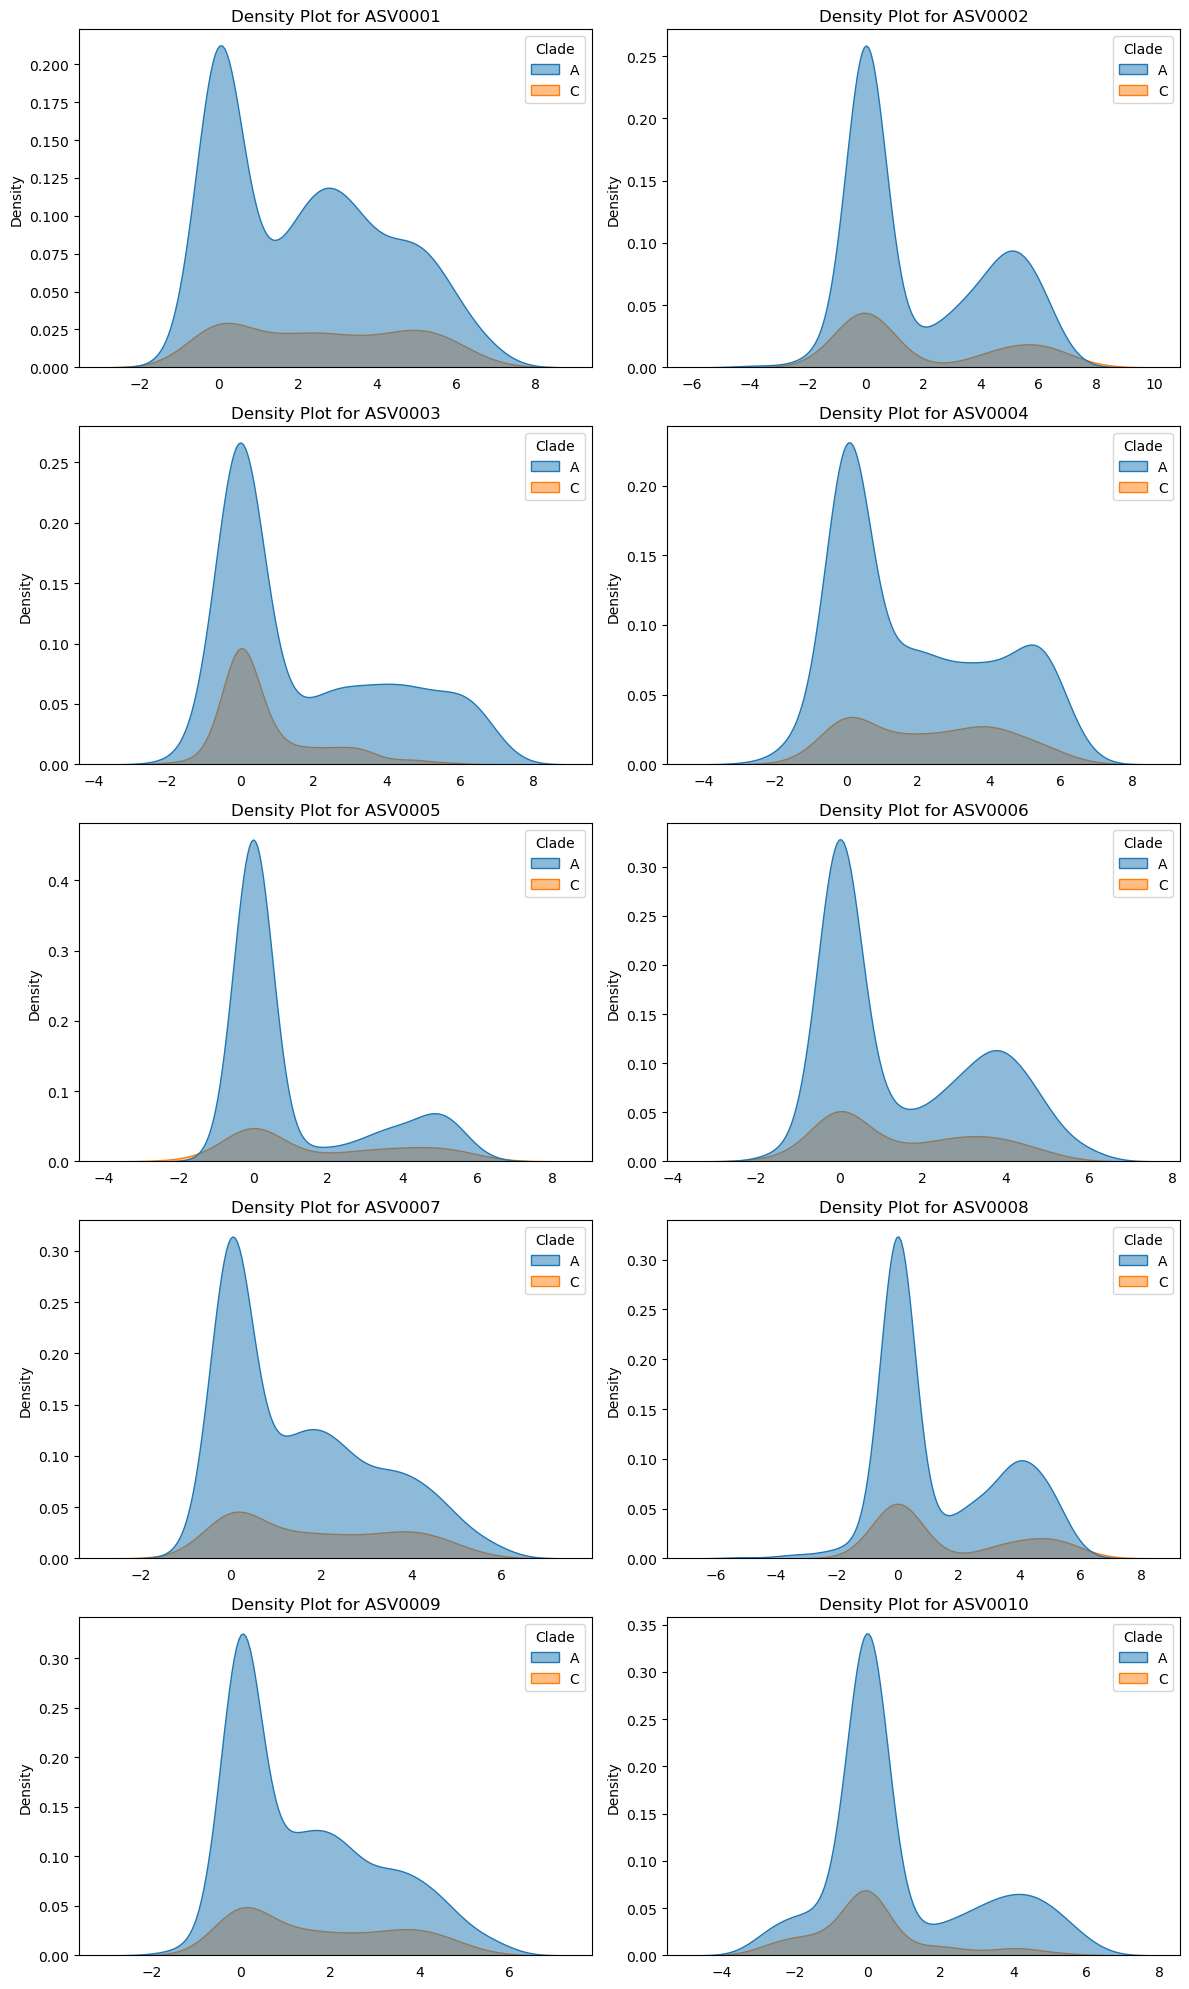

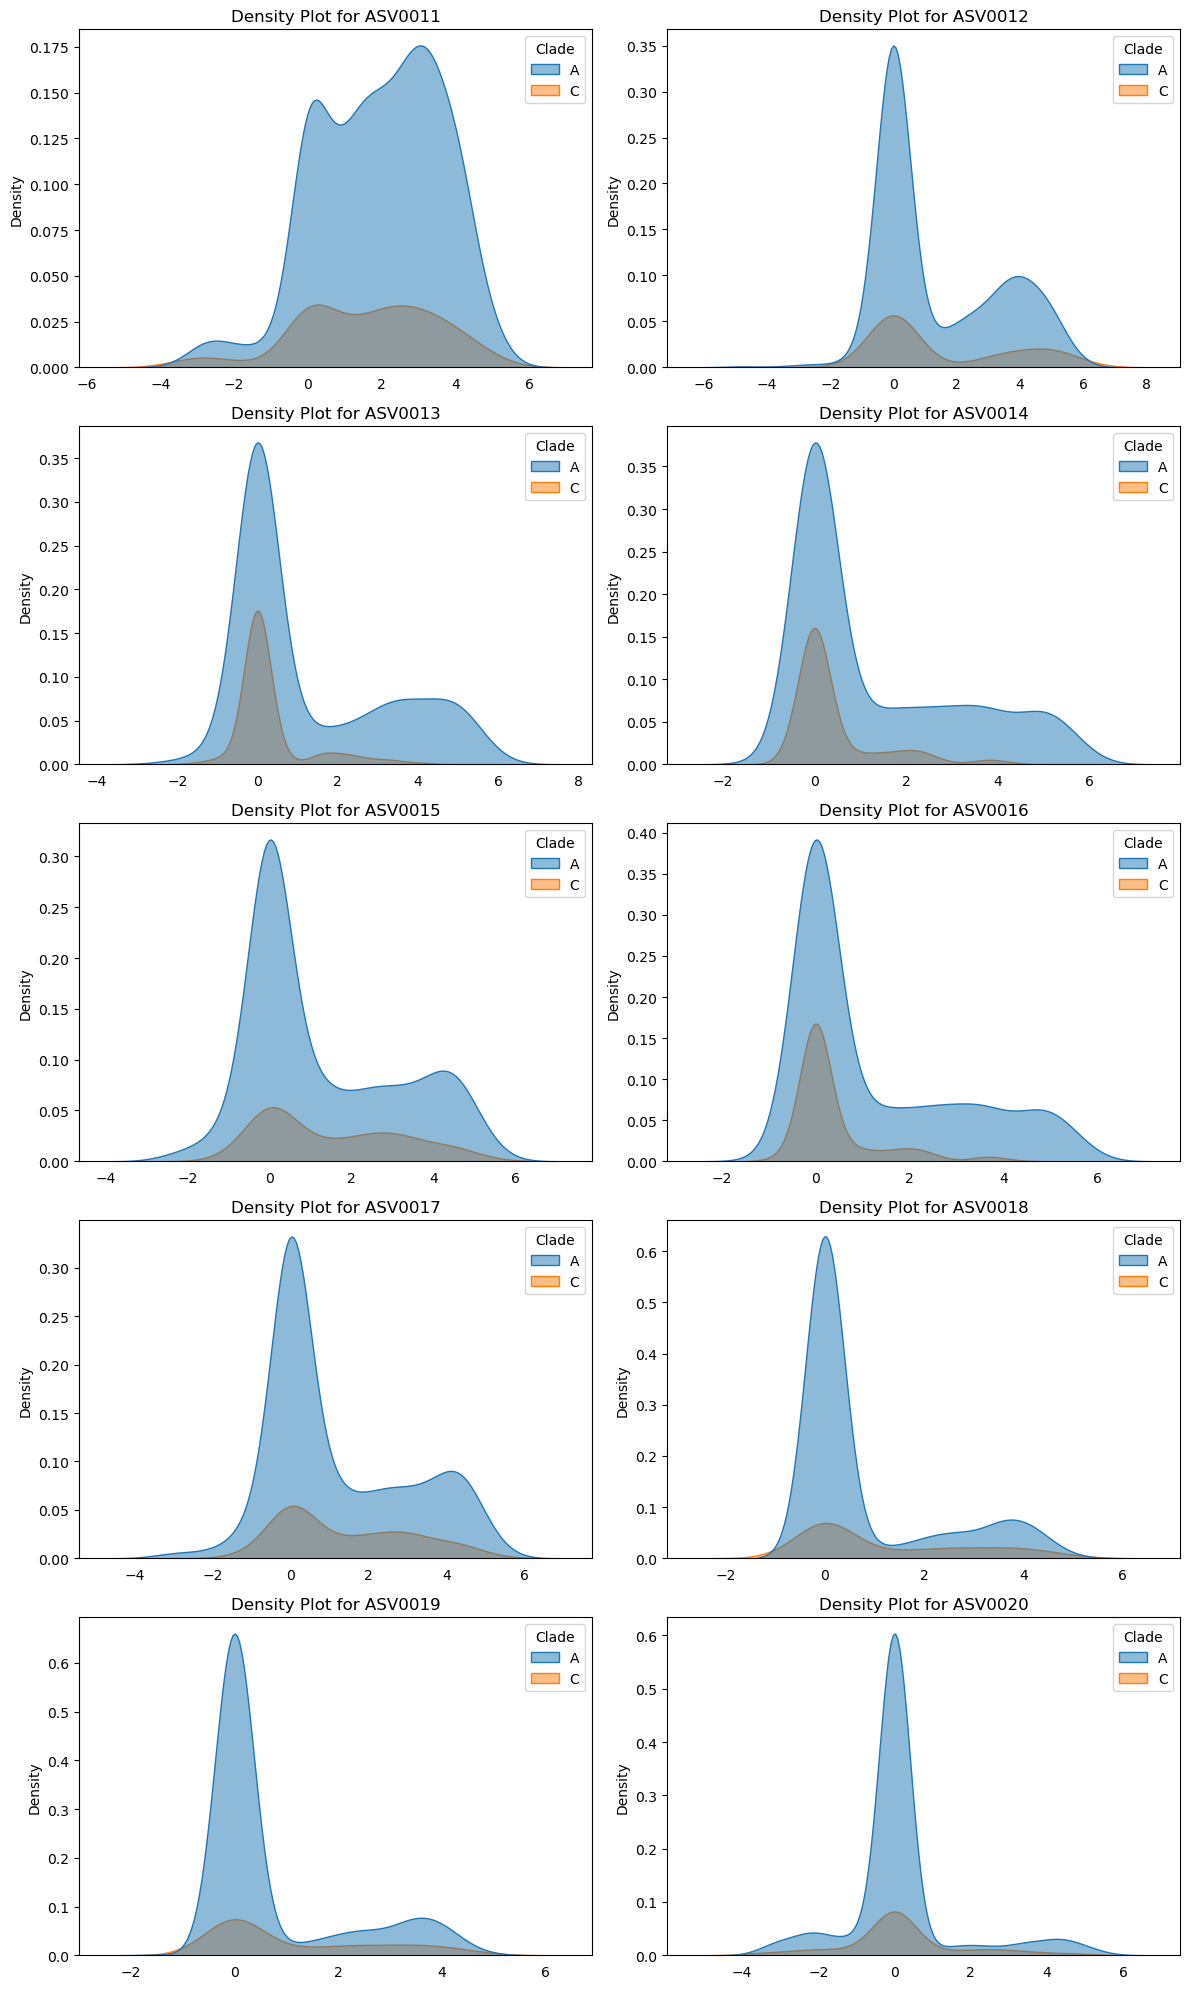

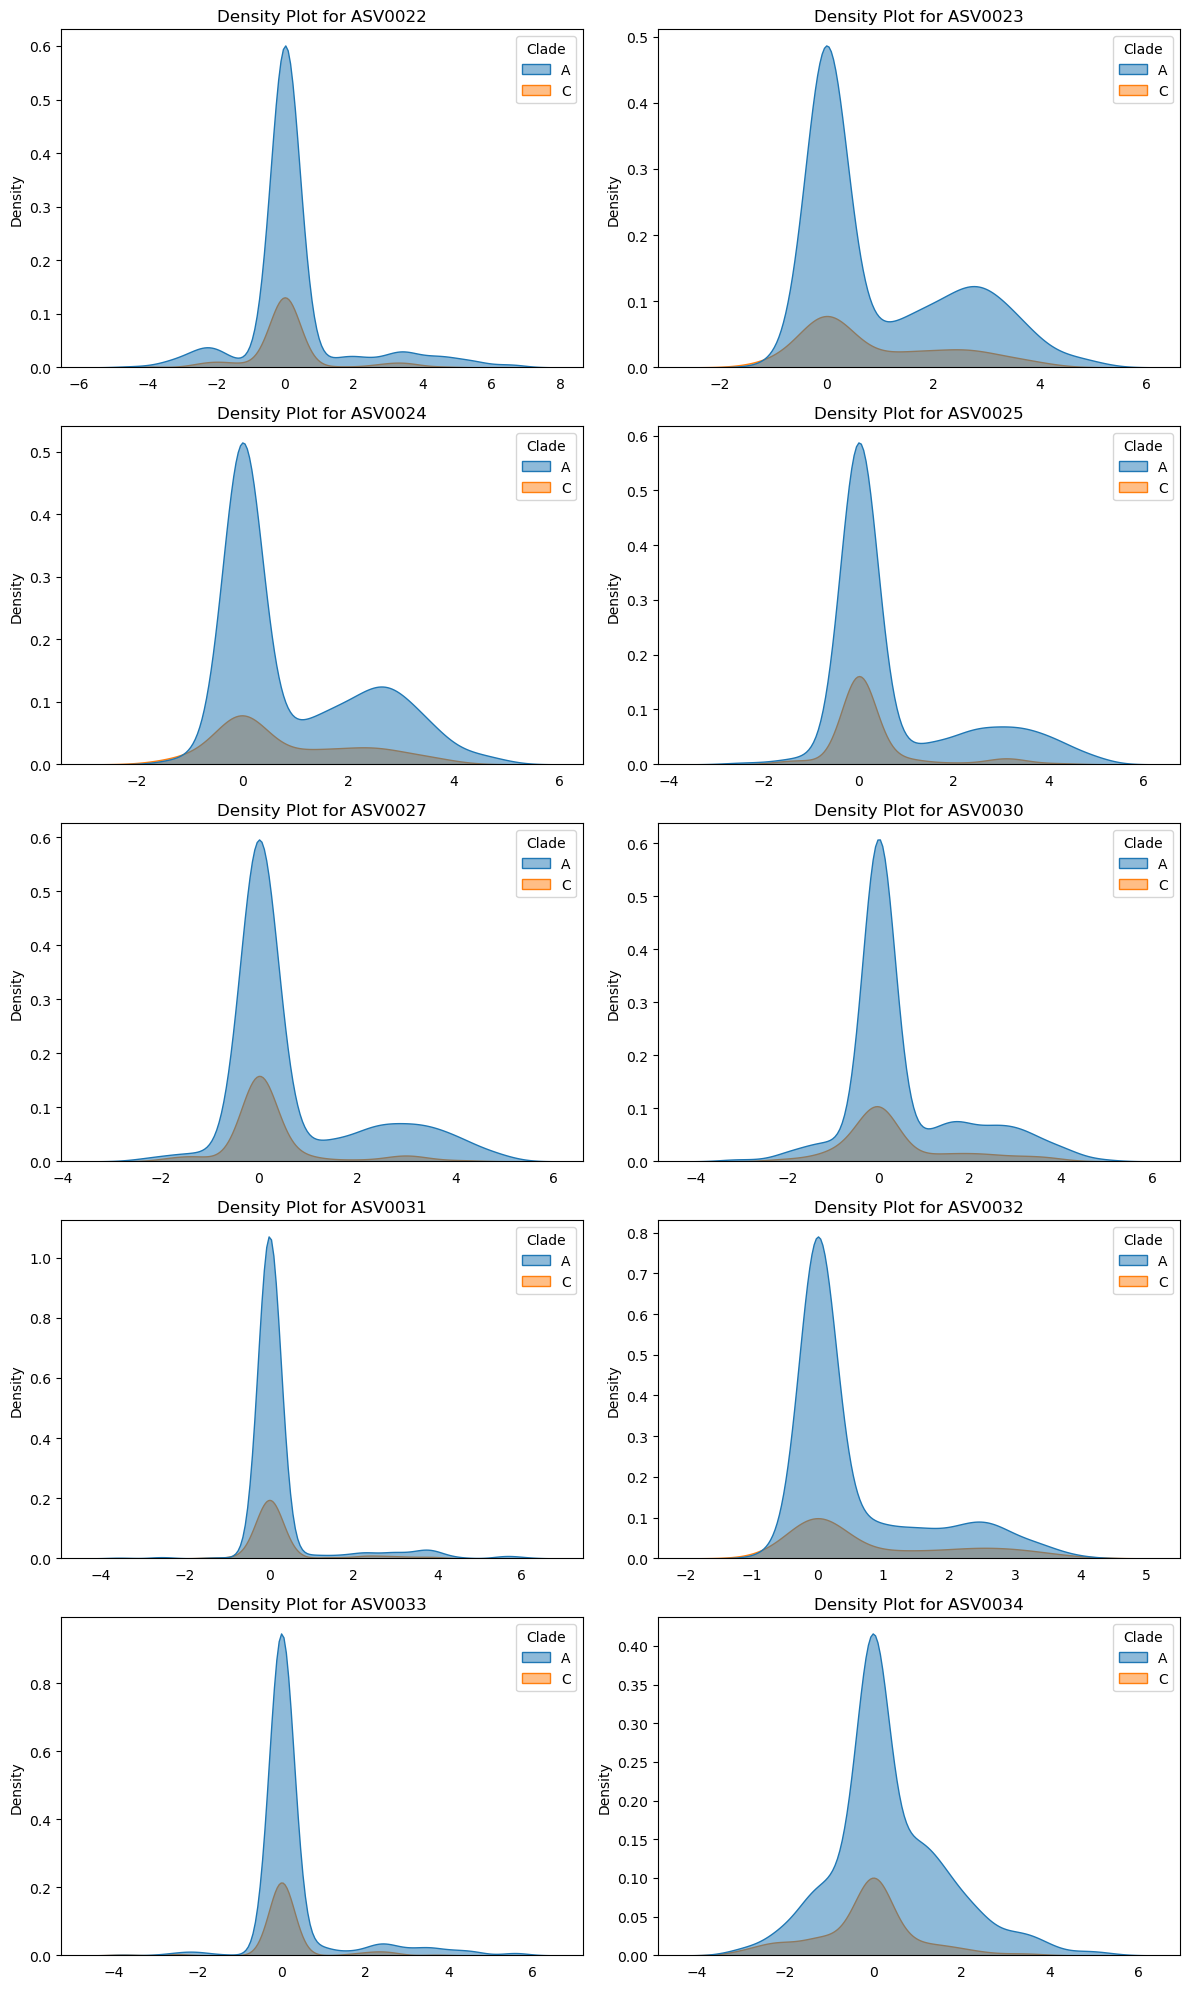

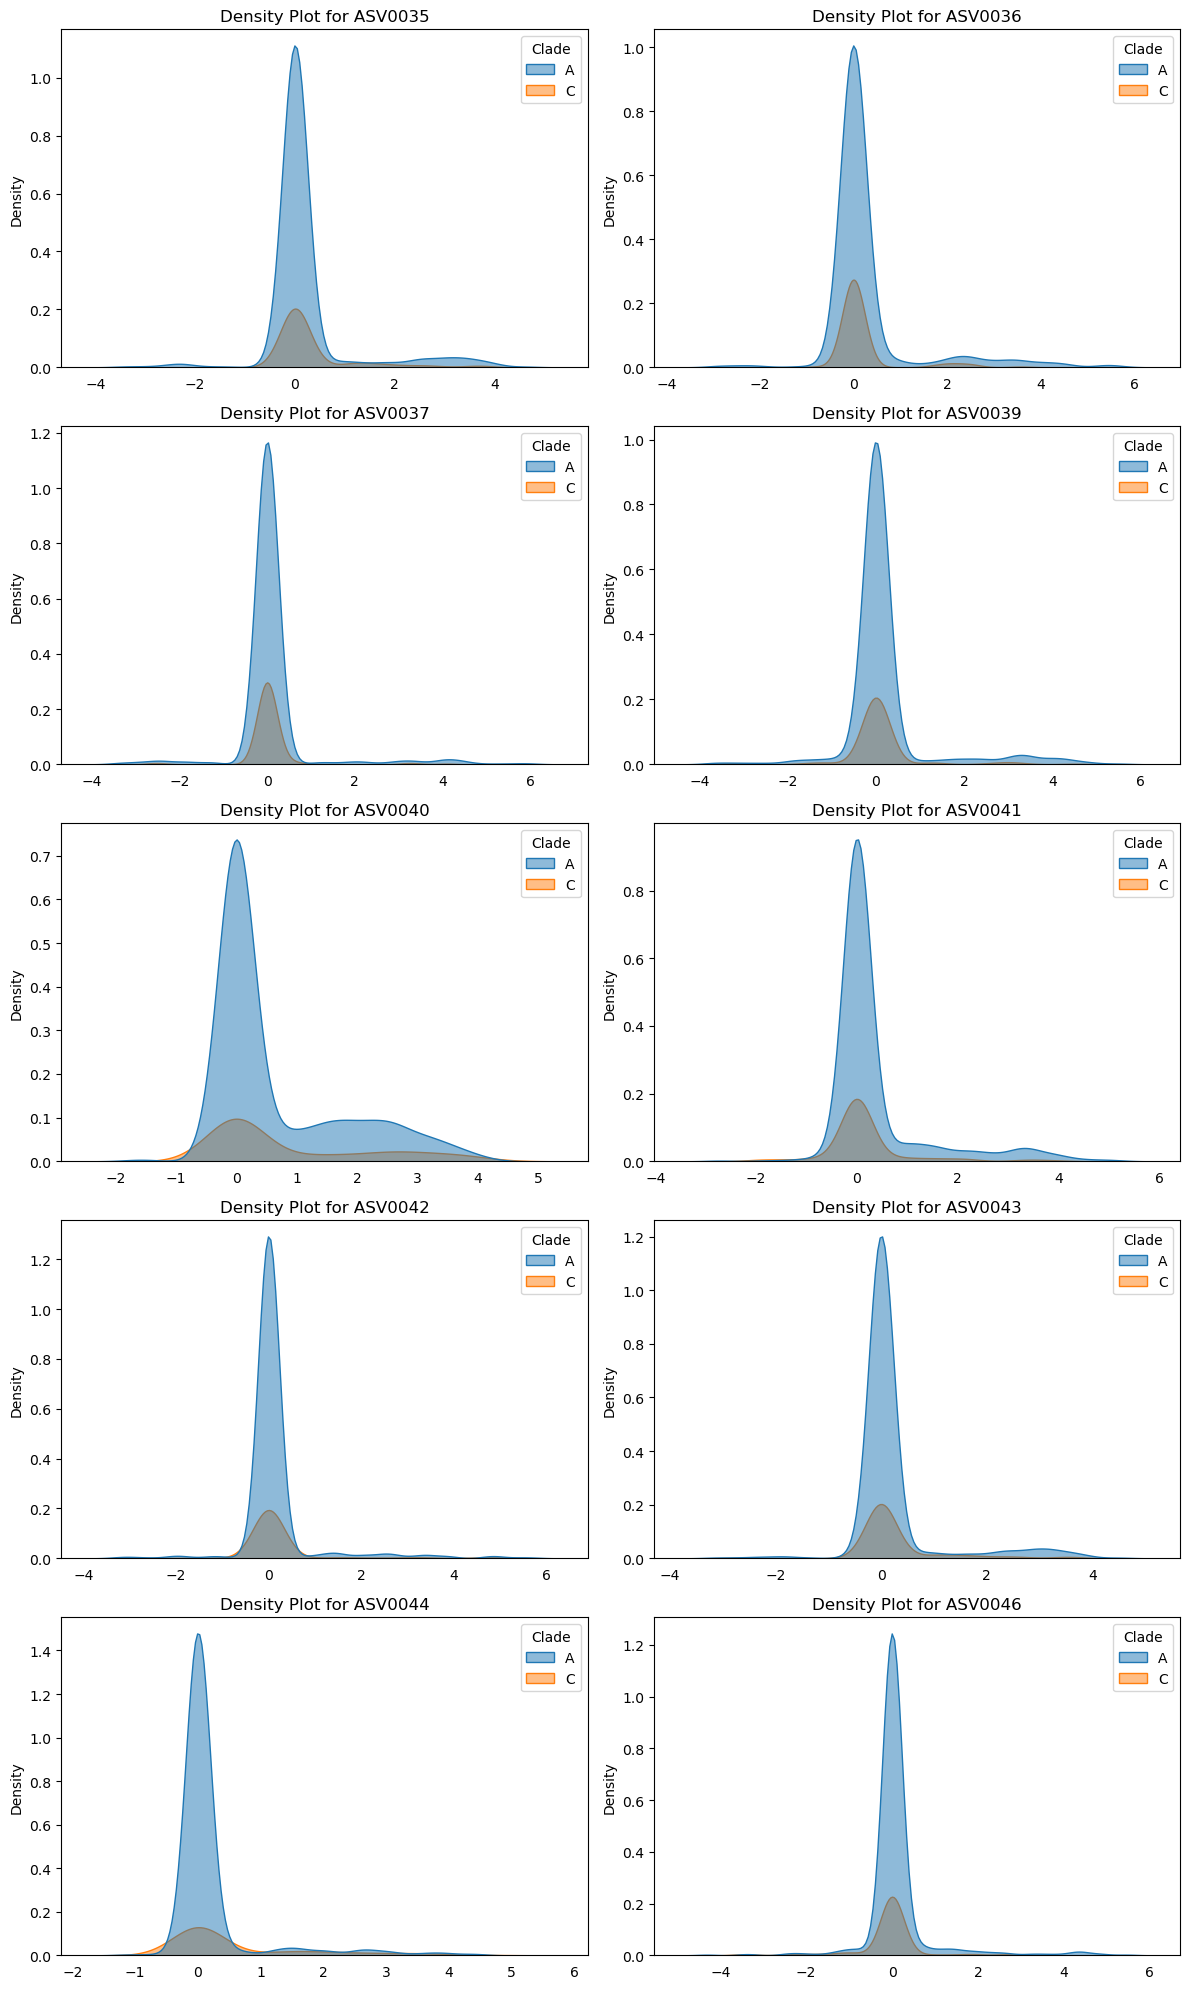

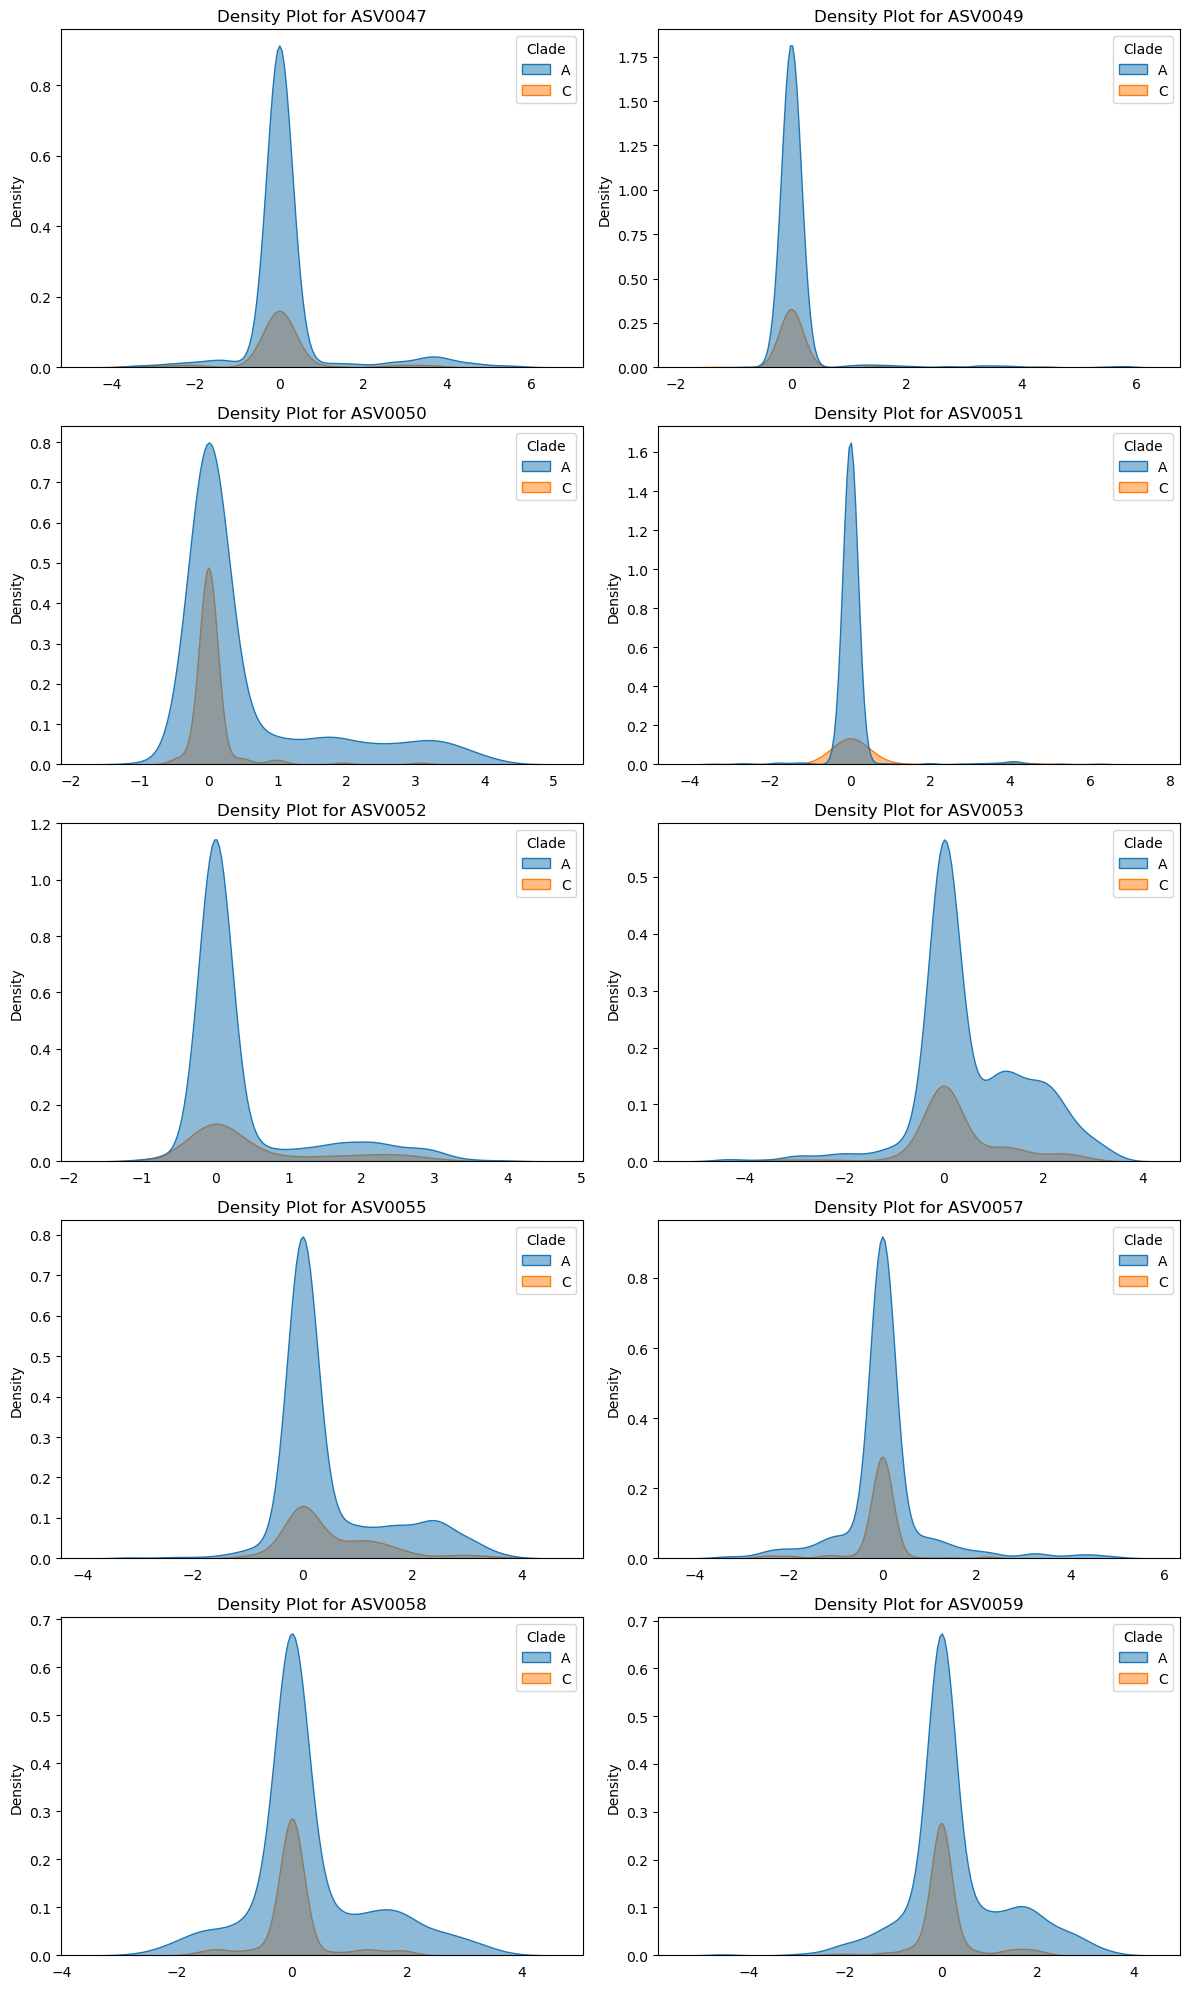

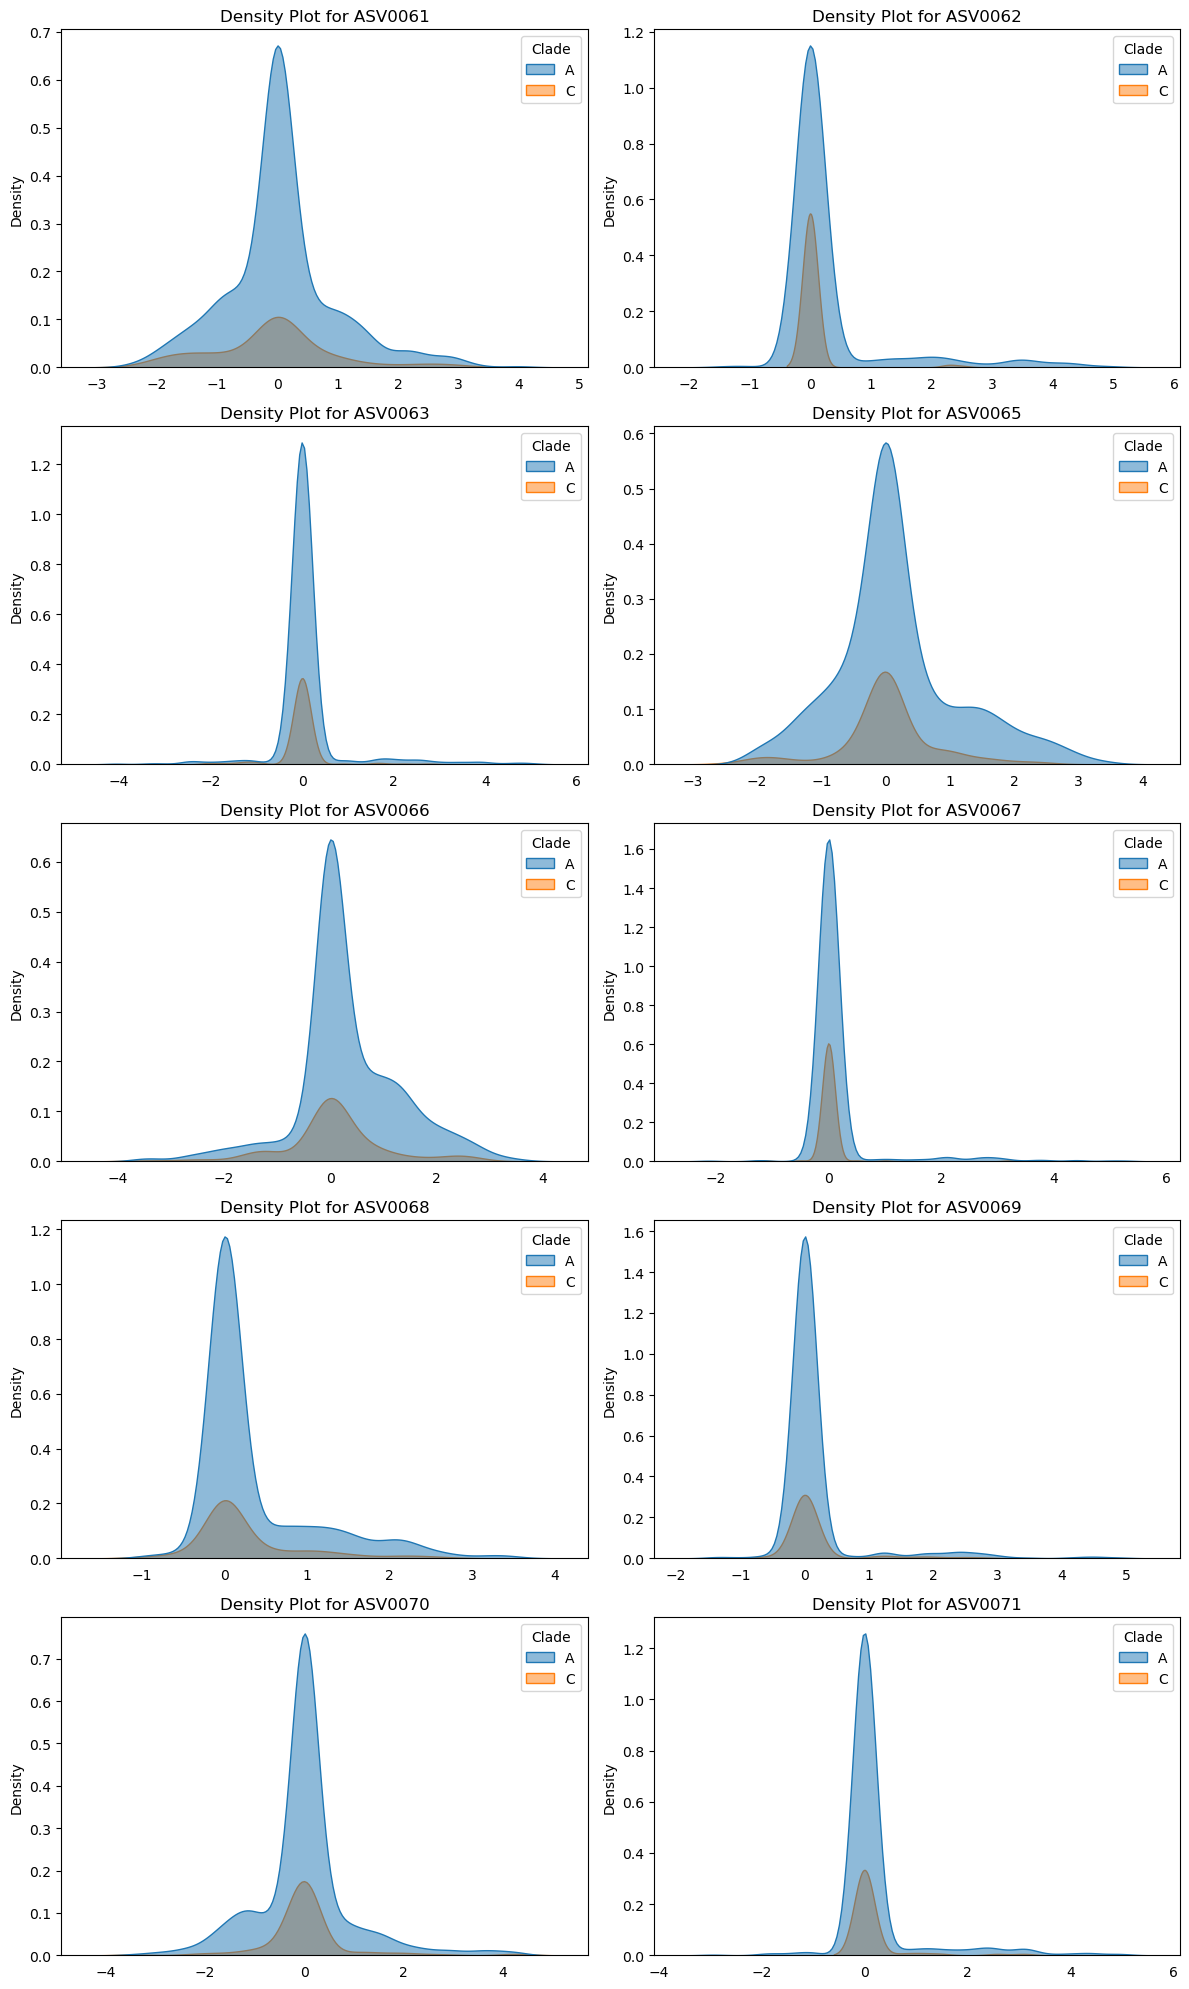

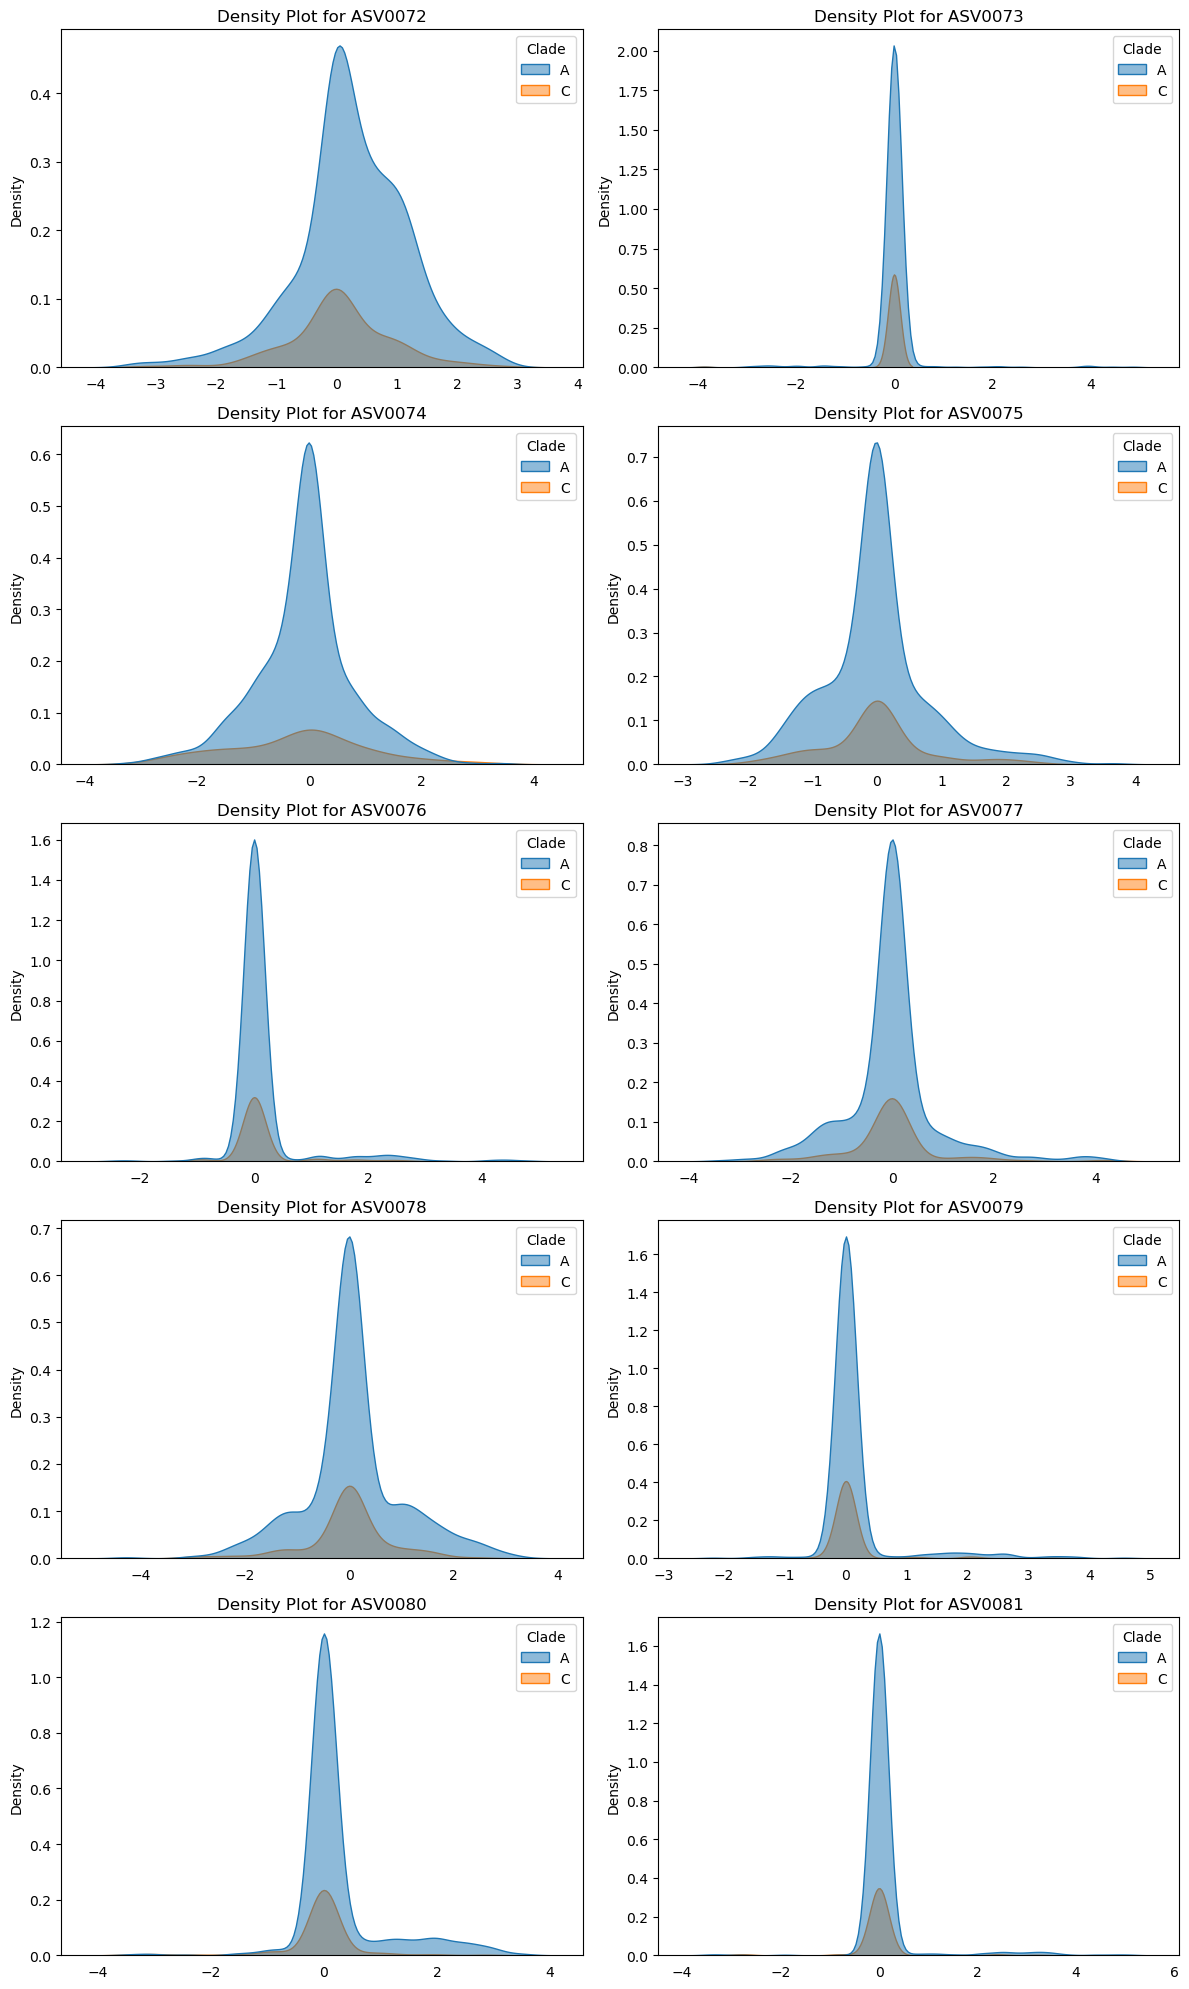

/Users/kasan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


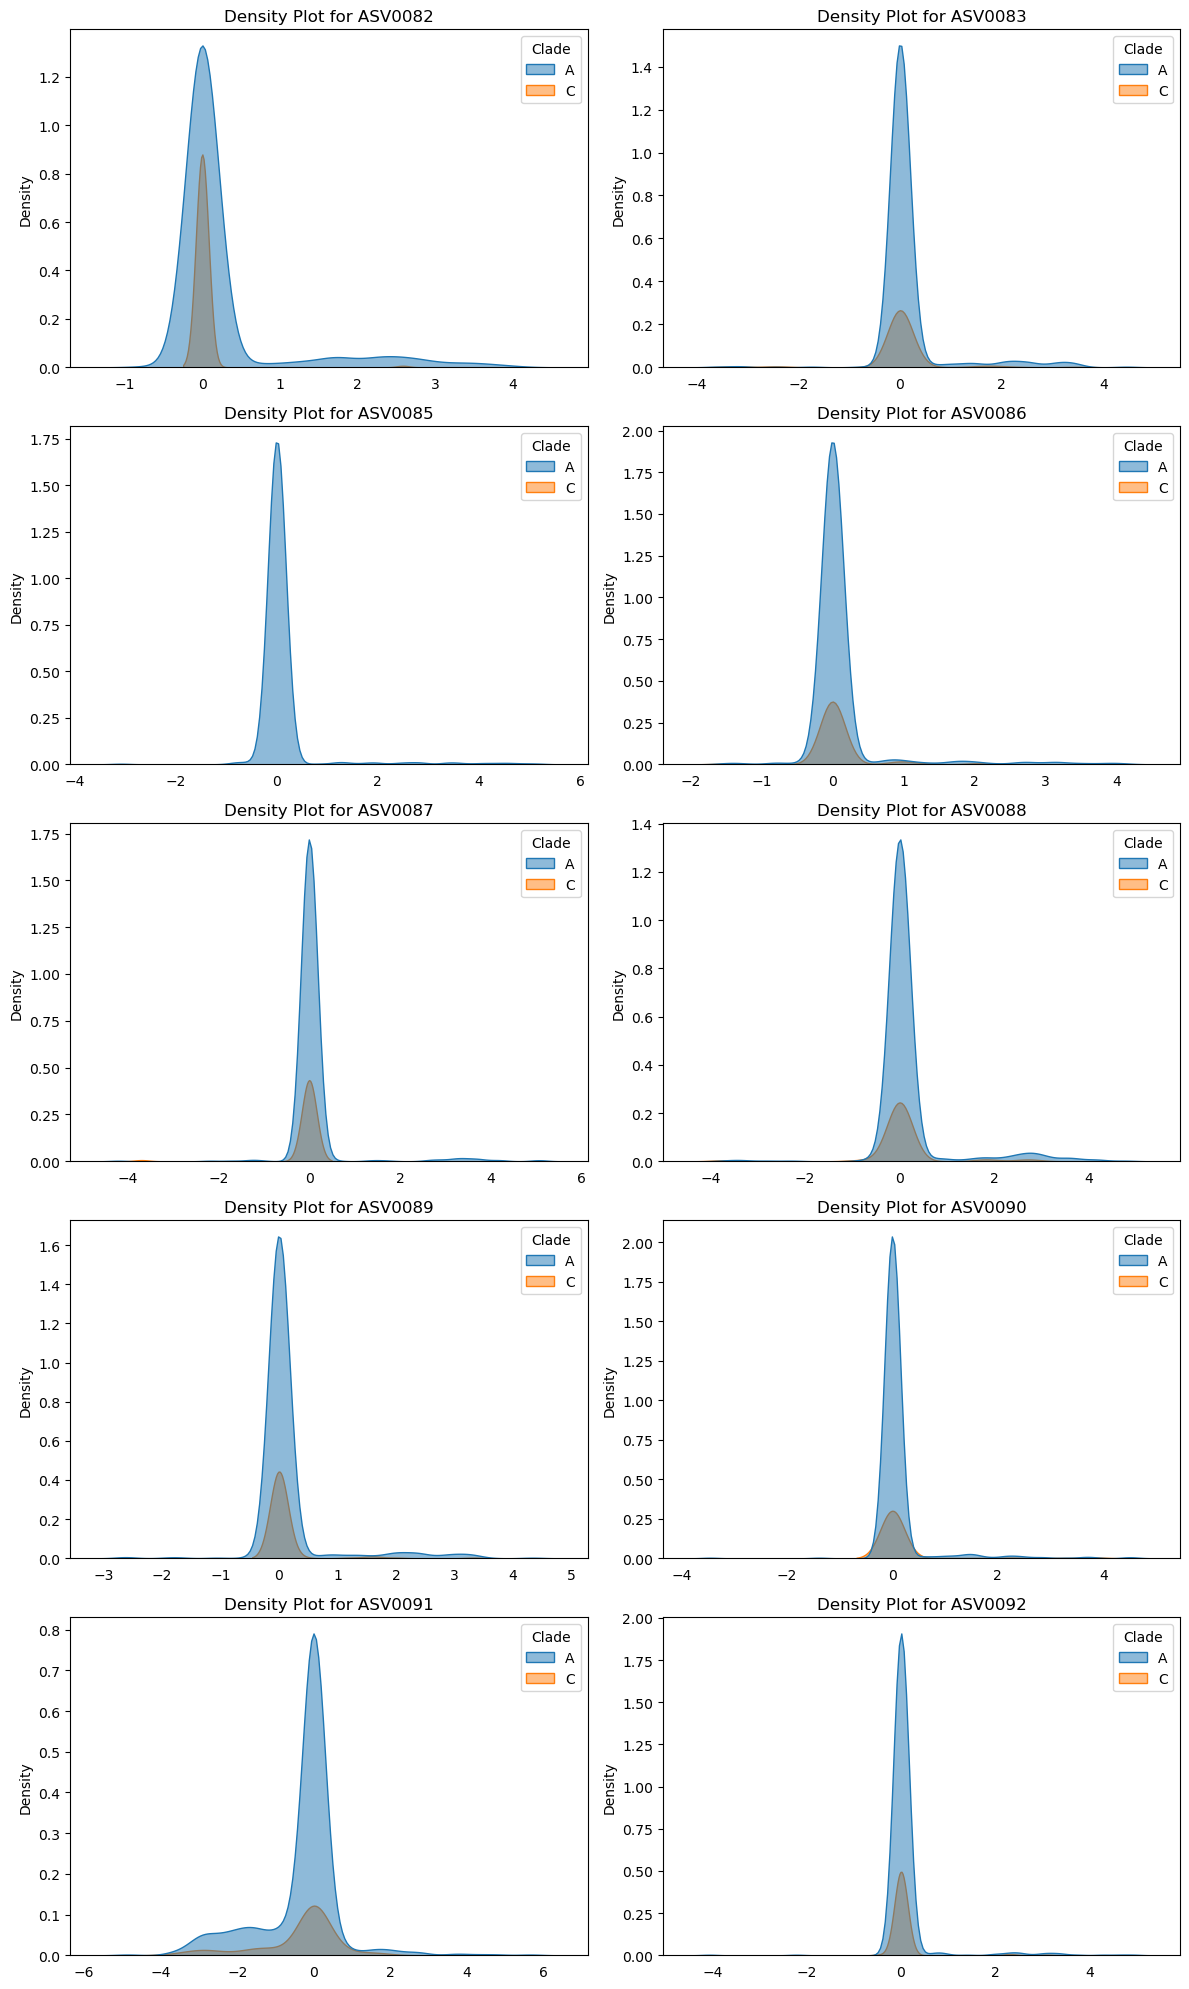

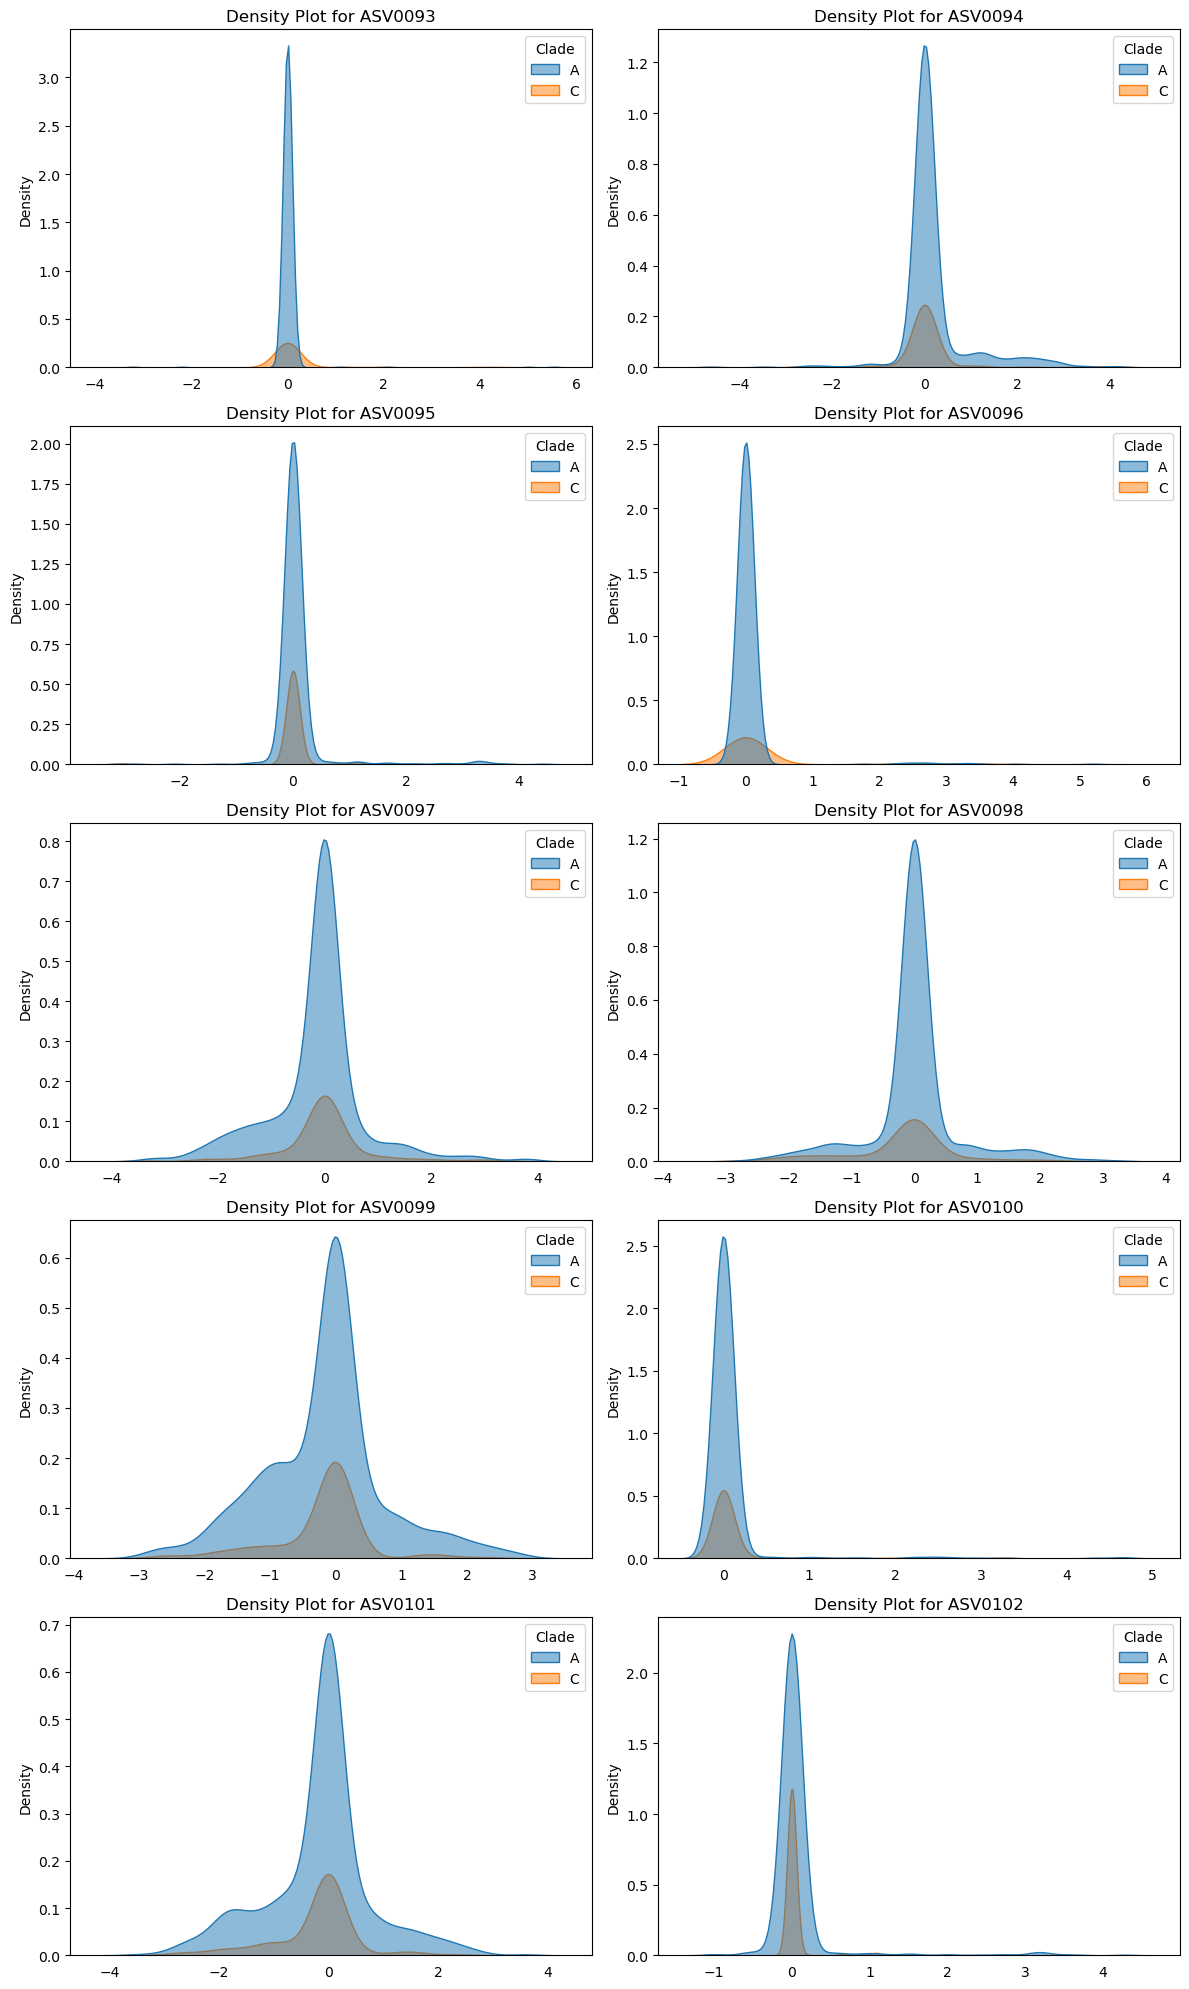

/Users/kasan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


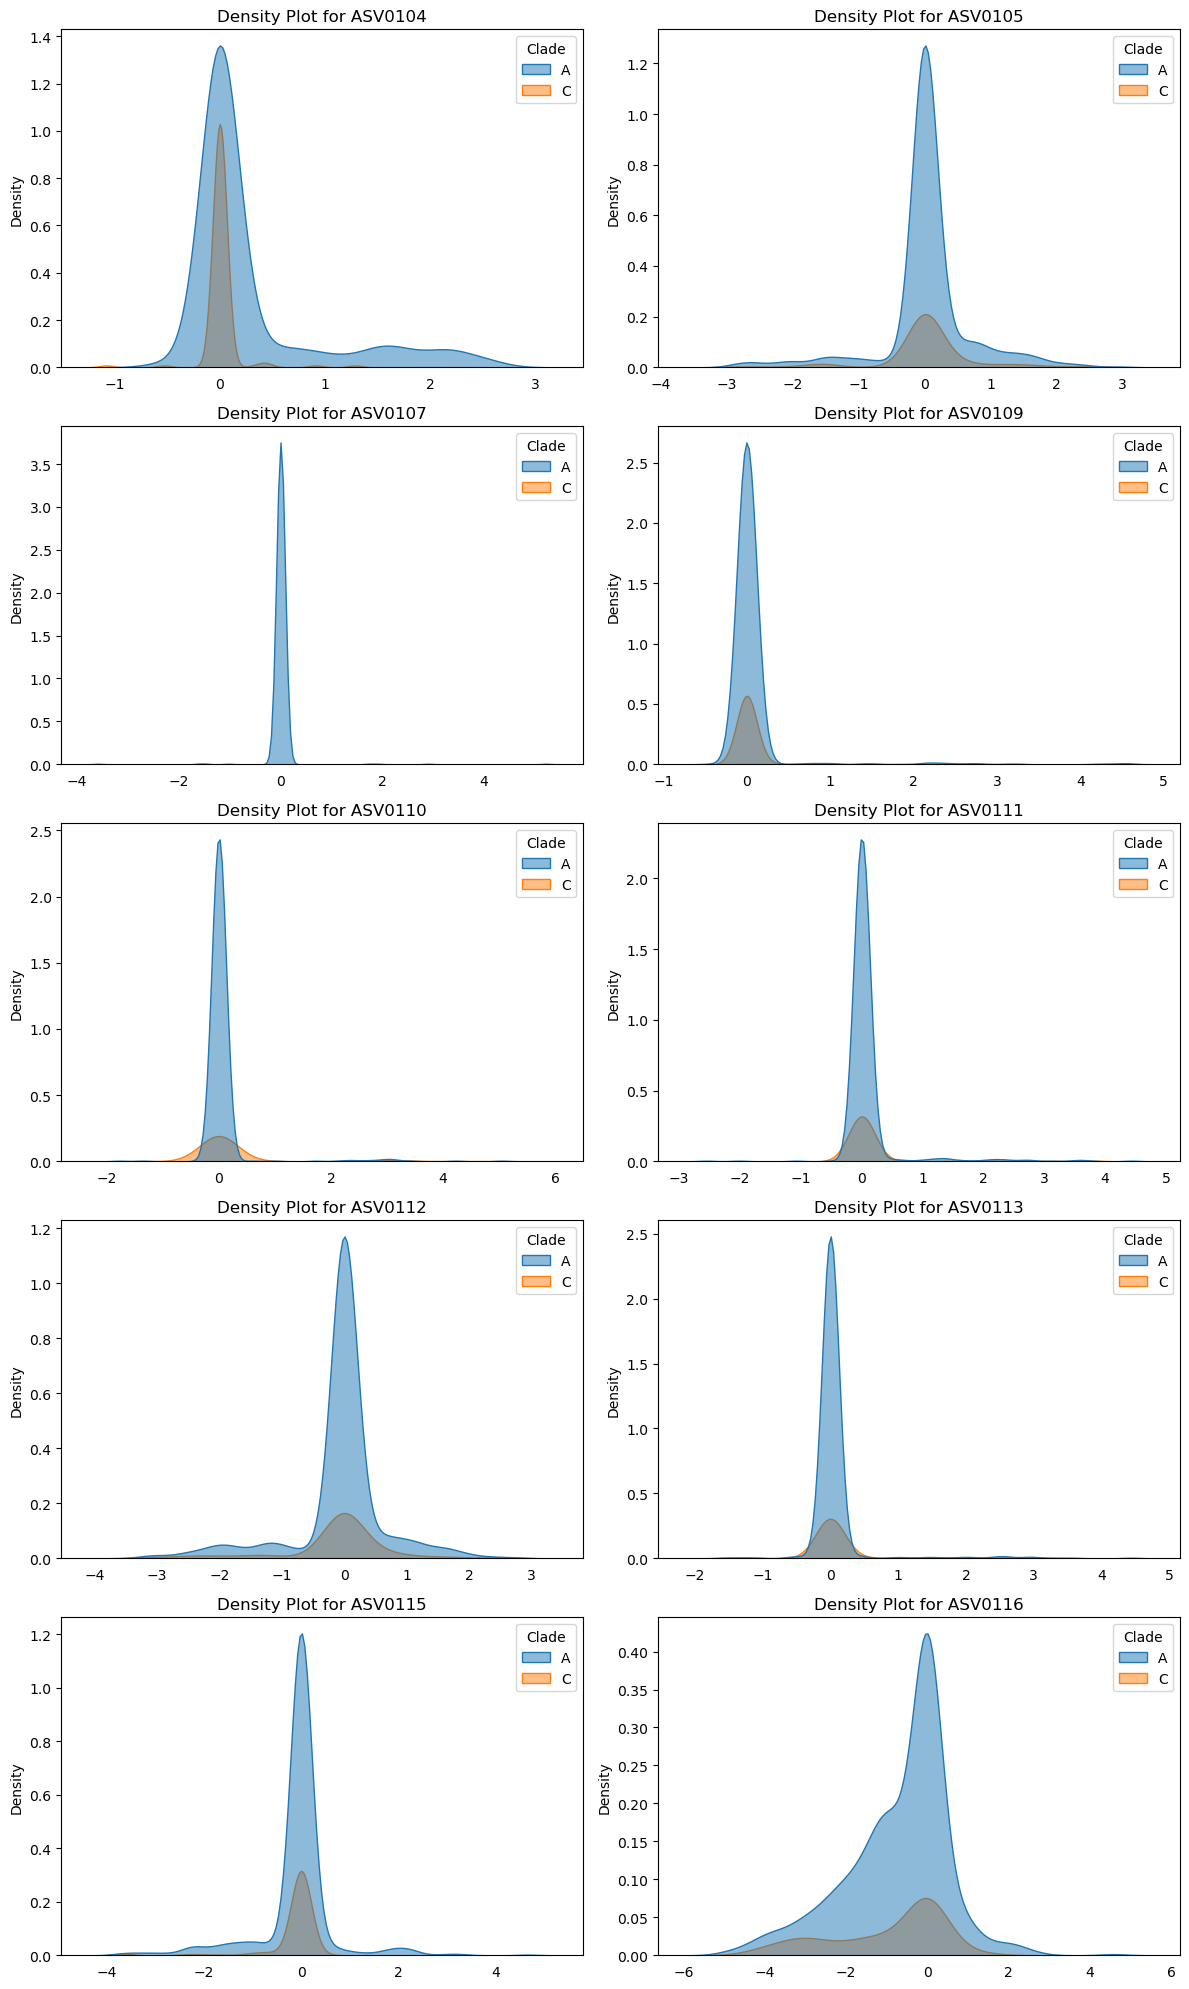

/Users/kasan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


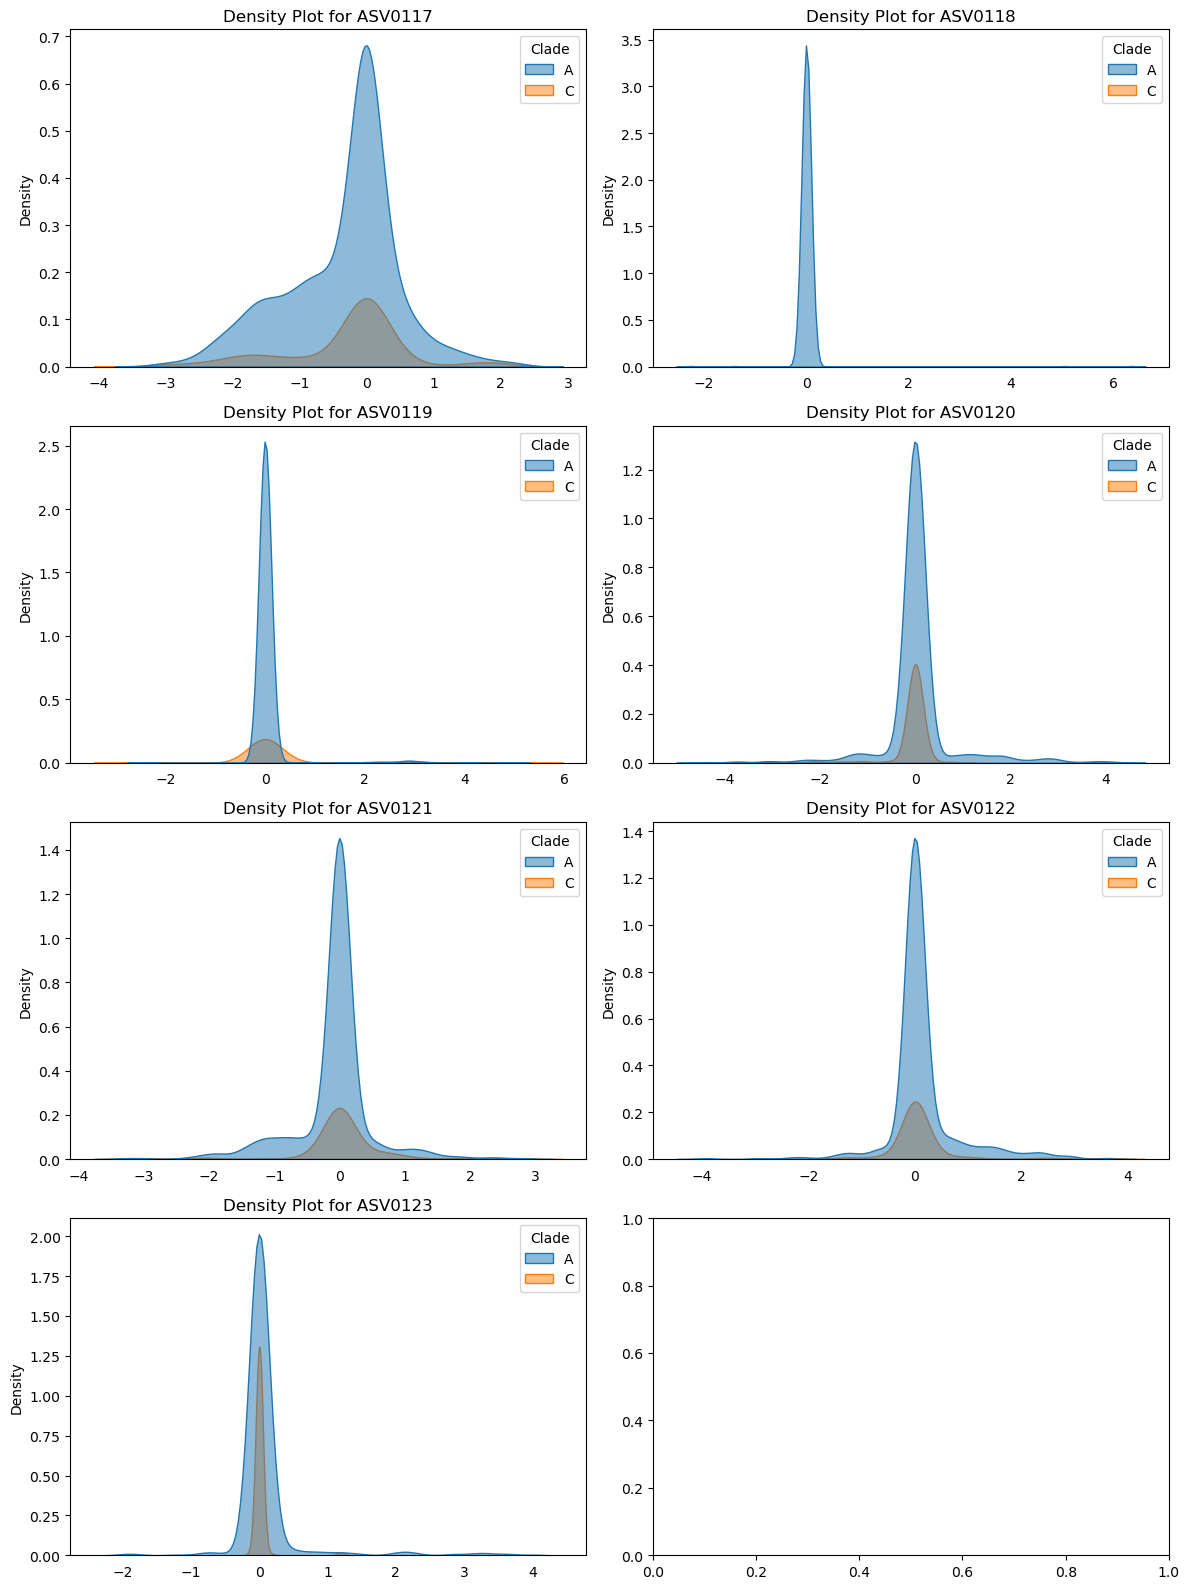

In [7]:
from math import ceil

# Create density plots in batches of 10 numeric columns
numeric_columns = ac_data.columns[7:114]
chunk_size = 10

# Calculate the number of batches needed
num_batches = ceil(len(numeric_columns) / chunk_size)

for batch in range(num_batches):
    start_idx = batch * chunk_size
    end_idx = (batch + 1) * chunk_size
    current_numeric_columns = numeric_columns[start_idx:end_idx]

    # Set up subplots
    num_plots = len(current_numeric_columns)
    num_rows = (num_plots // 2) + (num_plots % 2)
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 4*num_rows))

    # Flatten the 2D array of axes for easier iteration
    axes = axes.flatten()

    # Create density plots and arrange them in the grid
    for i, var in enumerate(current_numeric_columns):
        sns.kdeplot(data=ac_data, x=var, hue='Clade', fill=True, alpha=0.5, ax=axes[i])
        axes[i].set_title(f'Density Plot for {var}')
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', which='both', bottom=False, top=False)  # Remove x-axis ticks

    # Adjust layout
    plt.tight_layout()

    # Save the figure
    plt.savefig(f'../plots/grid_plots_batch_{batch + 1}.png')  # Adjust the file name as needed

    # Show the figure (optional)
    plt.show()

Observations:
- Density plots are overlapping. 
- Clade C 'echos' Clade A in some plots.
- Data are highly correlated. 

## Correlation Matrix: First 1000 Most Abundant ASVs

In [8]:
asv_columns = ac_data.columns[7:] # starts at 7 but python doesn't pick first one

In [9]:
asv1000corr = ac_data[asv_columns].corr()
# subset first 20 for plot
asv1000corr.iloc[:,0:20].info()


<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, ASV0001 to ASV10787
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ASV0001  1000 non-null   float64
 1   ASV0002  1000 non-null   float64
 2   ASV0003  1000 non-null   float64
 3   ASV0004  1000 non-null   float64
 4   ASV0005  1000 non-null   float64
 5   ASV0006  1000 non-null   float64
 6   ASV0007  1000 non-null   float64
 7   ASV0008  1000 non-null   float64
 8   ASV0009  1000 non-null   float64
 9   ASV0010  1000 non-null   float64
 10  ASV0011  1000 non-null   float64
 11  ASV0012  1000 non-null   float64
 12  ASV0013  1000 non-null   float64
 13  ASV0014  1000 non-null   float64
 14  ASV0015  1000 non-null   float64
 15  ASV0016  1000 non-null   float64
 16  ASV0017  1000 non-null   float64
 17  ASV0018  1000 non-null   float64
 18  ASV0019  1000 non-null   float64
 19  ASV0020  1000 non-null   float64
dtypes: float64(20)
memory usage: 164.1+ KB


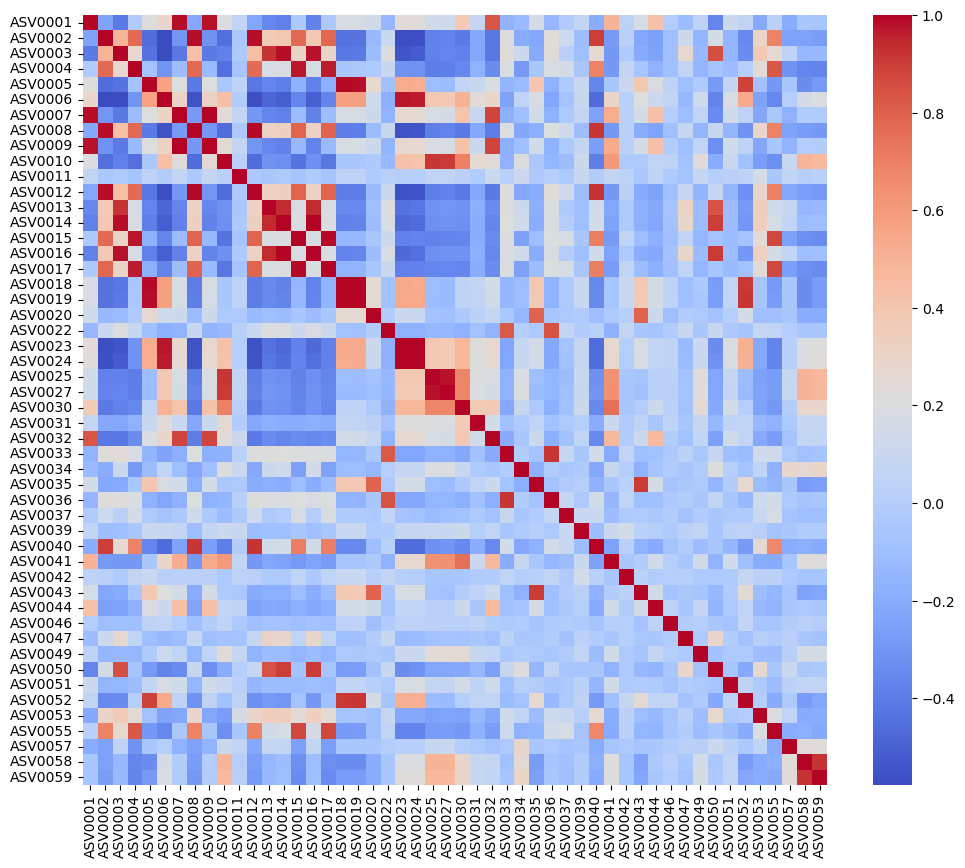

In [10]:
# both species and both clades for all observations
# use larger size for the labels to all be visible
plt.figure(figsize=(12, 10)) 
sns.heatmap(asv1000corr.iloc[0:50:,0:50], 
           # annot = True, 
            cmap="coolwarm", 
            #fmt=".2f", 
           # linewidths=.5, 
            # annot_kws={"color": "black"} # Set the text color
           )  

plt.savefig("../plots/asv_corr_plot.png", dpi = 300)

plt.show()

#### There are many bacteria (ASV) variables that are highly correlated when reviewing the overall data for both clades and both species. 
#### Dimensionality reduction will be necessary for modeling Clade A predictions. 

## Correlation Plot - Clade A

In [11]:
#df[df['Clade']=="A"]
cladeA = ac_data[ac_data['Clade']=='A']

# redo correlation for only clade A bacteria
cladeA_bacteria = cladeA.iloc[:,7:]

# corr
cladeA_corr_matrix = cladeA_bacteria.corr()

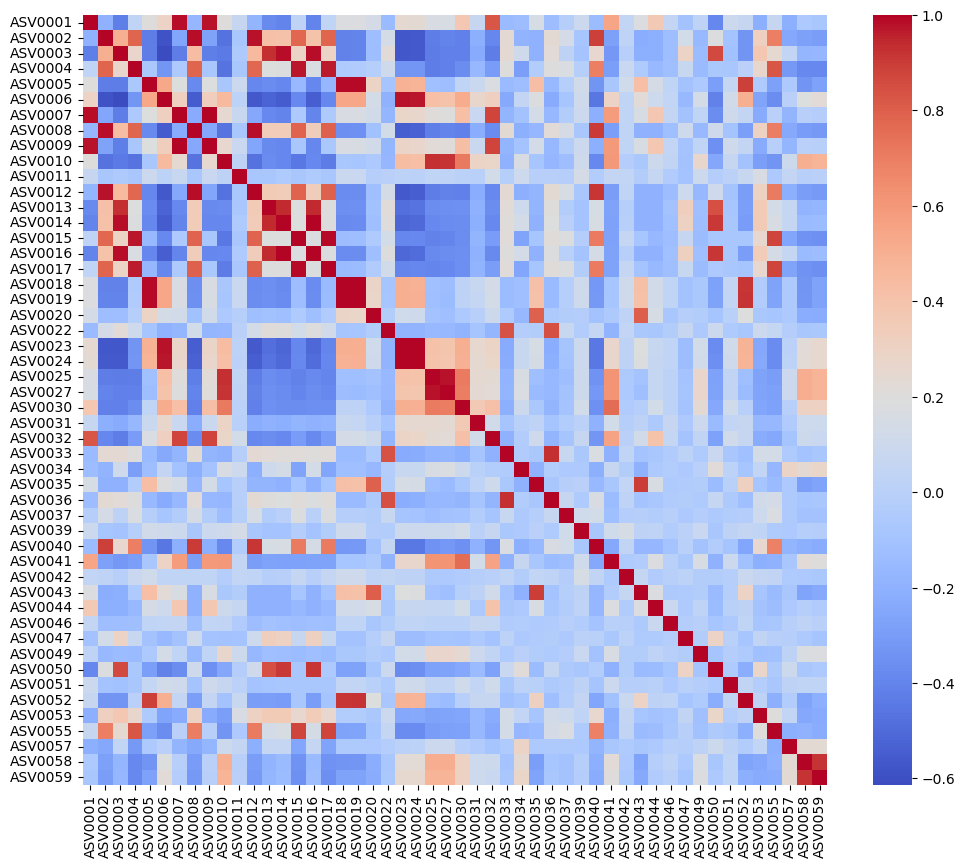

In [12]:


plt.figure(figsize=(12, 10)) 
sns.heatmap(cladeA_corr_matrix.iloc[0:50:,0:50], 
           # annot = True, 
            cmap="coolwarm", 
            #fmt=".2f", 
           # linewidths=.5, 
            # annot_kws={"color": "black"} # Set the text color
           )  
plt.savefig("../plots/cladeA_corr_plot.png", dpi = 300)


plt.show()

### Clade A is the dominant clade with 628 observations out of 767. The correlation plots for the first 50 for both clades vs only Clade A look almost exactly the same. This is attributed to the fact that Clade A dominates the dataset.